# <center> EDA + Satisfaction Prediction + Reviews NLP + RFM Analysis + Deployment

## Table of Contents
1.0 Introduction

2.0 Data loading

3.0 Data Cleaning

        3.1 Merging ALL Dataframes

        3.2 Handling Missing Values

        3.3 Drop Duplicates

        3.4 Feature Engineering

4.0 Exploratory Data Analysis (EDA)

        6.1 Univariate Analysis

        6.2 Multivariate Analysis
    
5.0 - Data preprocesing

        6.1 Data encoding

        6.2 Feature scaling

        6.3 Handle imbalance
        
6.0 - Modeling

        6.1 Apply ML models

        6.2 Hyperparameter Tuning
        
7.0 - Pipeline

8.0 - NLP For Customer Satisfaction

9.0 - Customer Segmentation

        9.1 Customer Segmentation by RFM Analysis

        9.2 Customer Segmentation by K-Means

10.0 - Model Deployment (Classification & Clustering)

11.0 - Wrap up & Conclusion

# 1.0 Introduction
## This project is about "Olist", a Brazilian ecommerce store which has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil where its features allow viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

# 2.0 Data Loading

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od  #download data from kaggleimport 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2.1 Read All Files

In [3]:
dataset_url='https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce'
od.download(dataset_url, data_dir='data')

Skipping, found downloaded files in "data/brazilian-ecommerce" (use force=True to force download)


In [4]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/brazilian-ecommerce/olist_sellers_dataset.csv
data/brazilian-ecommerce/product_category_name_translation.csv
data/brazilian-ecommerce/olist_orders_dataset.csv
data/brazilian-ecommerce/olist_order_items_dataset.csv
data/brazilian-ecommerce/olist_customers_dataset.csv
data/brazilian-ecommerce/olist_geolocation_dataset.csv
data/brazilian-ecommerce/olist_order_payments_dataset.csv
data/brazilian-ecommerce/olist_order_reviews_dataset.csv
data/brazilian-ecommerce/olist_products_dataset.csv


In [5]:
customers_df= pd.read_csv('data/brazilian-ecommerce/olist_customers_dataset.csv')
geolocation_df= pd.read_csv('data/brazilian-ecommerce/olist_geolocation_dataset.csv')
items_df= pd.read_csv('data/brazilian-ecommerce/olist_order_items_dataset.csv')
payments_df= pd.read_csv('data/brazilian-ecommerce/olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('data/brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('data/brazilian-ecommerce/olist_orders_dataset.csv')
products_df= pd.read_csv('data/brazilian-ecommerce/olist_products_dataset.csv')
sellers_df= pd.read_csv('data/brazilian-ecommerce/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('data/brazilian-ecommerce/product_category_name_translation.csv')

The first look into the datasets

In [6]:
for df in ['customers_df', 'geolocation_df', 'items_df', 'payments_df', 'reviews_df', 'orders_df', 'products_df', 'sellers_df', 'category_translation_df']:
    print(f"Dataset Name: {df}")
    display(eval(df).head(5))

Dataset Name: customers_df


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

Dataset Name: geolocation_df


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

Dataset Name: items_df


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

Dataset Name: payments_df


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

Dataset Name: reviews_df


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

Dataset Name: orders_df


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

Dataset Name: products_df


product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

Dataset Name: sellers_df


seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

Dataset Name: category_translation_df


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

### 2.2 Merging All Dataframes

In [7]:
df= pd.merge(customers_df, orders_df, on="customer_id", how='inner')
df= df.merge(reviews_df, on="order_id", how='inner')
df= df.merge(items_df, on="order_id", how='inner')
df= df.merge(products_df, on="product_id", how='inner')
df= df.merge(payments_df, on="order_id", how='inner')
df= df.merge(sellers_df, on='seller_id', how='inner')
df= df.merge(category_translation_df, on='product_category_name', how='inner')
df.shape

(115609, 40)

In [8]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

In [9]:
#Certainly, for the problems we are gping to solve we don't need 'customer_zip_code_prefix' and 'seller_zip_code_prefix' so we will drop them

df.drop(['customer_zip_code_prefix','seller_zip_code_prefix'],axis=1,inplace=True)

# 3.0 Data Cleaning

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

review_score  order_item_id          price  freight_value  \
count  115609.000000  115609.000000  115609.000000  115609.000000   
mean        4.034409       1.194535     120.619850      20.056880   
std         1.385584       0.685926     182.653476      15.836184   
min         1.000000       1.000000       0.850000       0.000000   
25%         4.000000       1.000000      39.900000      13.080000   
50%         5.000000       1.000000      74.900000      16.320000   
75%         5.000000       1.000000     134.900000      21.210000   
max         5.000000      21.000000    6735.000000     409.680000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count        115609.000000               115609.000000       115609.000000   
mean             48.766541                  785.808198            2.205373   
std              10.034187                  652.418619            1.717771   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  346.000000            1.000000   
50%              52.000000                  600.000000            1.000000   
75%              57.000000                  983.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count     115608.000000      115608.000000      115608.000000   
mean        2113.907697          30.307903          16.638477   
std         3781.754895          16.211108          13.473570   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1800.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  payment_sequential  payment_installments  \
count     115608.000000       115609.000000         115609.000000   
mean          23.113167            1.093747              2.946233   
std           11.755083            0.729849              2.781087   
min            6.000000            1.000000              0.000000   
25%           15.000000            1.000000              1.000000   
50%           20.000000            1.000000              2.000000   
75%           30.000000            1.000000              4.000000   
max          118.000000           29.000000             24.000000   

       payment_value  
count  115609.000000  
mean      172.387379  
std       265.873969  
min         0.000000  
25%        60.870000  
50%       108.050000  
75%       189.480000  
max     13664.080000

Let's use some useful function to explore our data

In [12]:
from scipy import stats

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values  
    summary['% Missing'] = np.round(df.isna().sum().values/len(df)*100,2)
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values

    for name in summary['Name'].value_counts().index:
        # Calculate entropy for object-type columns
        if df[name].dtype == 'object':
            summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 
        else:
            # Print information for non-object-type columns
            summary.loc[summary['Name'] == name, 'Entropy'] = '-'
    return summary

resumetable(df)

Dataset Shape: (115609, 38)


Name   dtypes  Missing  % Missing  Uniques  \
0                     customer_id   object        0       0.00    96516   
1              customer_unique_id   object        0       0.00    93396   
2                   customer_city   object        0       0.00     4093   
3                  customer_state   object        0       0.00       27   
4                        order_id   object        0       0.00    96516   
5                    order_status   object        0       0.00        7   
6        order_purchase_timestamp   object        0       0.00    95989   
7               order_approved_at   object       14       0.01    88332   
8    order_delivered_carrier_date   object     1195       1.03    79241   
9   order_delivered_customer_date   object     2400       2.08    93702   
10  order_estimated_delivery_date   object        0       0.00      449   
11                      review_id   object        0       0.00    96319   
12                   review_score    int64        0       0.00        5   
13           review_comment_title   object   101808      88.06     4477   
14         review_comment_message   object    66703      57.70    35176   
15           review_creation_date   object        0       0.00      632   
16        review_answer_timestamp   object        0       0.00    96163   
17                  order_item_id    int64        0       0.00       21   
18                     product_id   object        0       0.00    32171   
19                      seller_id   object        0       0.00     3028   
20            shipping_limit_date   object        0       0.00    91386   
21                          price  float64        0       0.00     5879   
22                  freight_value  float64        0       0.00     6954   
23          product_category_name   object        0       0.00       71   
24            product_name_lenght  float64        0       0.00       66   
25     product_description_lenght  float64        0       0.00     2958   
26             product_photos_qty  float64        0       0.00       19   
27               product_weight_g  float64        1       0.00     2197   
28              product_length_cm  float64        1       0.00       99   
29              product_height_cm  float64        1       0.00      102   
30               product_width_cm  float64        1       0.00       95   
31             payment_sequential    int64        0       0.00       29   
32                   payment_type   object        0       0.00        4   
33           payment_installments    int64        0       0.00       24   
34                  payment_value  float64        0       0.00    28657   
35                    seller_city   object        0       0.00      604   
36                   seller_state   object        0       0.00       23   
37  product_category_name_english   object        0       0.00       71   

                         First Value  \
0   06b8999e2fba1a1fbc88172c00ba8bc7   
1   861eff4711a542e4b93843c6dd7febb0   
2                             franca   
3                                 SP   
4   00e7ee1b050b8499577073aeb2a297a1   
5                          delivered   
6                2017-05-16 15:05:35   
7                2017-05-16 15:22:12   
8                2017-05-23 10:47:57   
9                2017-05-25 10:35:35   
10               2017-06-05 00:00:00   
11  88b8b52d46df026a9d1ad2136a59b30b   
12                                 4   
13                               NaN   
14                               NaN   
15               2017-05-26 00:00:00   
16               2017-05-30 22:34:40   
17                                 1   
18  a9516a079e37a9c9c36b9b78b10169e8   
19  7c67e1448b00f6e969d365cea6b010ab   
20               2017-05-22 15:22:12   
21                            124.99   
22                             21.88   
23                 moveis_escritorio   
24                              41.0   
25                            1141.0   
26                     

### 3.1 Handling Missing Values

##### Drop All Missing Values in datetime columns. Keep " review_comment_message " & " review_comment_title " Features, they will be handled later

In [13]:
df.dropna(subset= ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

##### Check the missing values

In [14]:
missing = df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']][df.product_weight_g.isna()]
missing

product_weight_g  product_length_cm  product_height_cm  \
27352               NaN                NaN                NaN   

       product_width_cm  
27352               NaN

In [15]:
# Since all the missing values are in the same raw, we will drop this raw
df.drop(missing.index, inplace=True)

# Reset Index
df.reset_index(inplace= True, drop= True)

## 3.2 Feature Engineering

##### Classify Products Categories (71) into 9 main Categories

In [16]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name_english.apply(classify_cat)

In [17]:
df.product_category.value_counts()

product_category
Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9722
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: count, dtype: int64

##### Combine Width, Height and Length to get Product Volume

In [18]:
# Create Volume Column
df['product_vol_cm3'] = df.product_length_cm * df.product_width_cm * df.product_height_cm

# Drop Width, Height and Length
df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm'], axis= 1, inplace= True)

#### Convert Datetime features from Object to Datetime

In [19]:
date_columns = [
    'order_purchase_timestamp', 
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date', 
    'order_estimated_delivery_date',
    'review_creation_date', 
    'review_answer_timestamp',
    'shipping_limit_date', 
    'order_delivered_carrier_date'
]

for column in date_columns:
    df[column] = pd.to_datetime(df[column])

In [20]:
#Extract duration of estimated shipping from purchasing date untill estimated delivery date
df['estimated_days'] = pd.to_timedelta((df['order_estimated_delivery_date'].dt.date - df['order_purchase_timestamp'].dt.date)).dt.days

#Extract duration of shipping from purchasing date until delivered to customer date
df['arrival_days'] = pd.to_timedelta((df['order_delivered_customer_date'].dt.date - df['order_purchase_timestamp'].dt.date)).dt.days

#Extract duration of shipping from purchasing carrier delivered date untill delivered to customer
df['shipping_days'] = pd.to_timedelta((df['order_delivered_customer_date'].dt.date - df['order_delivered_carrier_date'].dt.date)).dt.days

#Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"
df.drop((df[['order_delivered_carrier_date', 'order_delivered_customer_date']][df.shipping_days < 0]).index, inplace= True)

##Shipping status from Seller to Carrier
# First get seller to carrier duration in days
df['seller_to_carrier_status'] = pd.to_timedelta((df['shipping_limit_date'].dt.date - df['order_delivered_carrier_date'].dt.date)).dt.days

# Now calssify the duration into 'OnTime/Early' & 'Late'
df['seller_to_carrier_status'] = df['seller_to_carrier_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

##Shipping status from Carrier to Customer
# First get difference between estimated delivery date and actual delivery date in days
df['arrival_status'] = pd.to_timedelta((df['order_estimated_delivery_date'].dt.date - df['order_delivered_customer_date'].dt.date)).dt.days

# Now Classify the duration in 'OnTime/Early' & 'Late'
df['arrival_status'] = df['arrival_status'].apply(lambda x : 'OnTime/Early' if x >=0 else 'Late')

#### Show statistics of new features

In [21]:
df[['estimated_days', 'arrival_days', 'shipping_days']].describe()

estimated_days   arrival_days  shipping_days
count   113140.000000  113140.000000  113140.000000
mean        24.469427      12.383578       9.127594
std          8.825504       9.365912       8.567799
min          3.000000       0.000000       0.000000
25%         19.000000       7.000000       4.000000
50%         24.000000      10.000000       7.000000
75%         29.000000      15.000000      12.000000
max        156.000000     208.000000     205.000000

#### Remove Outliers in both features ( More than 60 days )

In [22]:
outlier_indices = df[(df.estimated_days > 60) | (df.arrival_days > 60) | (df.shipping_days > 60)].index

df.drop(outlier_indices, inplace= True)
df.reset_index(inplace= True, drop= True)

##### Rating estimated delivery time

In [23]:
def categorize_rates(column):
    conditions = [
        (column < 8),
        (column < 16),
        (column < 25),
        (column < 40)
    ]
    choices = ['Very Fast', 'Fast', 'Neutral', 'Slow']
    return np.select(conditions, choices, default='Very Slow')

df['estimated_delivery_rate'] = categorize_rates(df['estimated_days'])
df['arrival_delivery_rate'] = categorize_rates(df['arrival_days'])
df['shipping_delivery_rate'] = categorize_rates(df['shipping_days'])

# 4.0 Exploratory Data Analysis ( EDA ) 

### 4.1 Univariate Analysis

To organize the work we will divide columns by data types.

In [24]:
id_columns = ['customer_id', 'customer_unique_id', 'order_id', 'review_id', 'order_item_id', 'product_id', 'seller_id']

numeric_columns = df.select_dtypes(include=['number']).drop(columns=id_columns, errors='ignore')
continuous_columns = [col for col in numeric_columns.columns if numeric_columns[col].nunique() > 30] 
discrete_columns = [col for col in numeric_columns.columns if col not in continuous_columns]
categorical_columns = list(df.select_dtypes(include=['object']).drop(columns=id_columns, errors='ignore').columns)


### Numerical columns

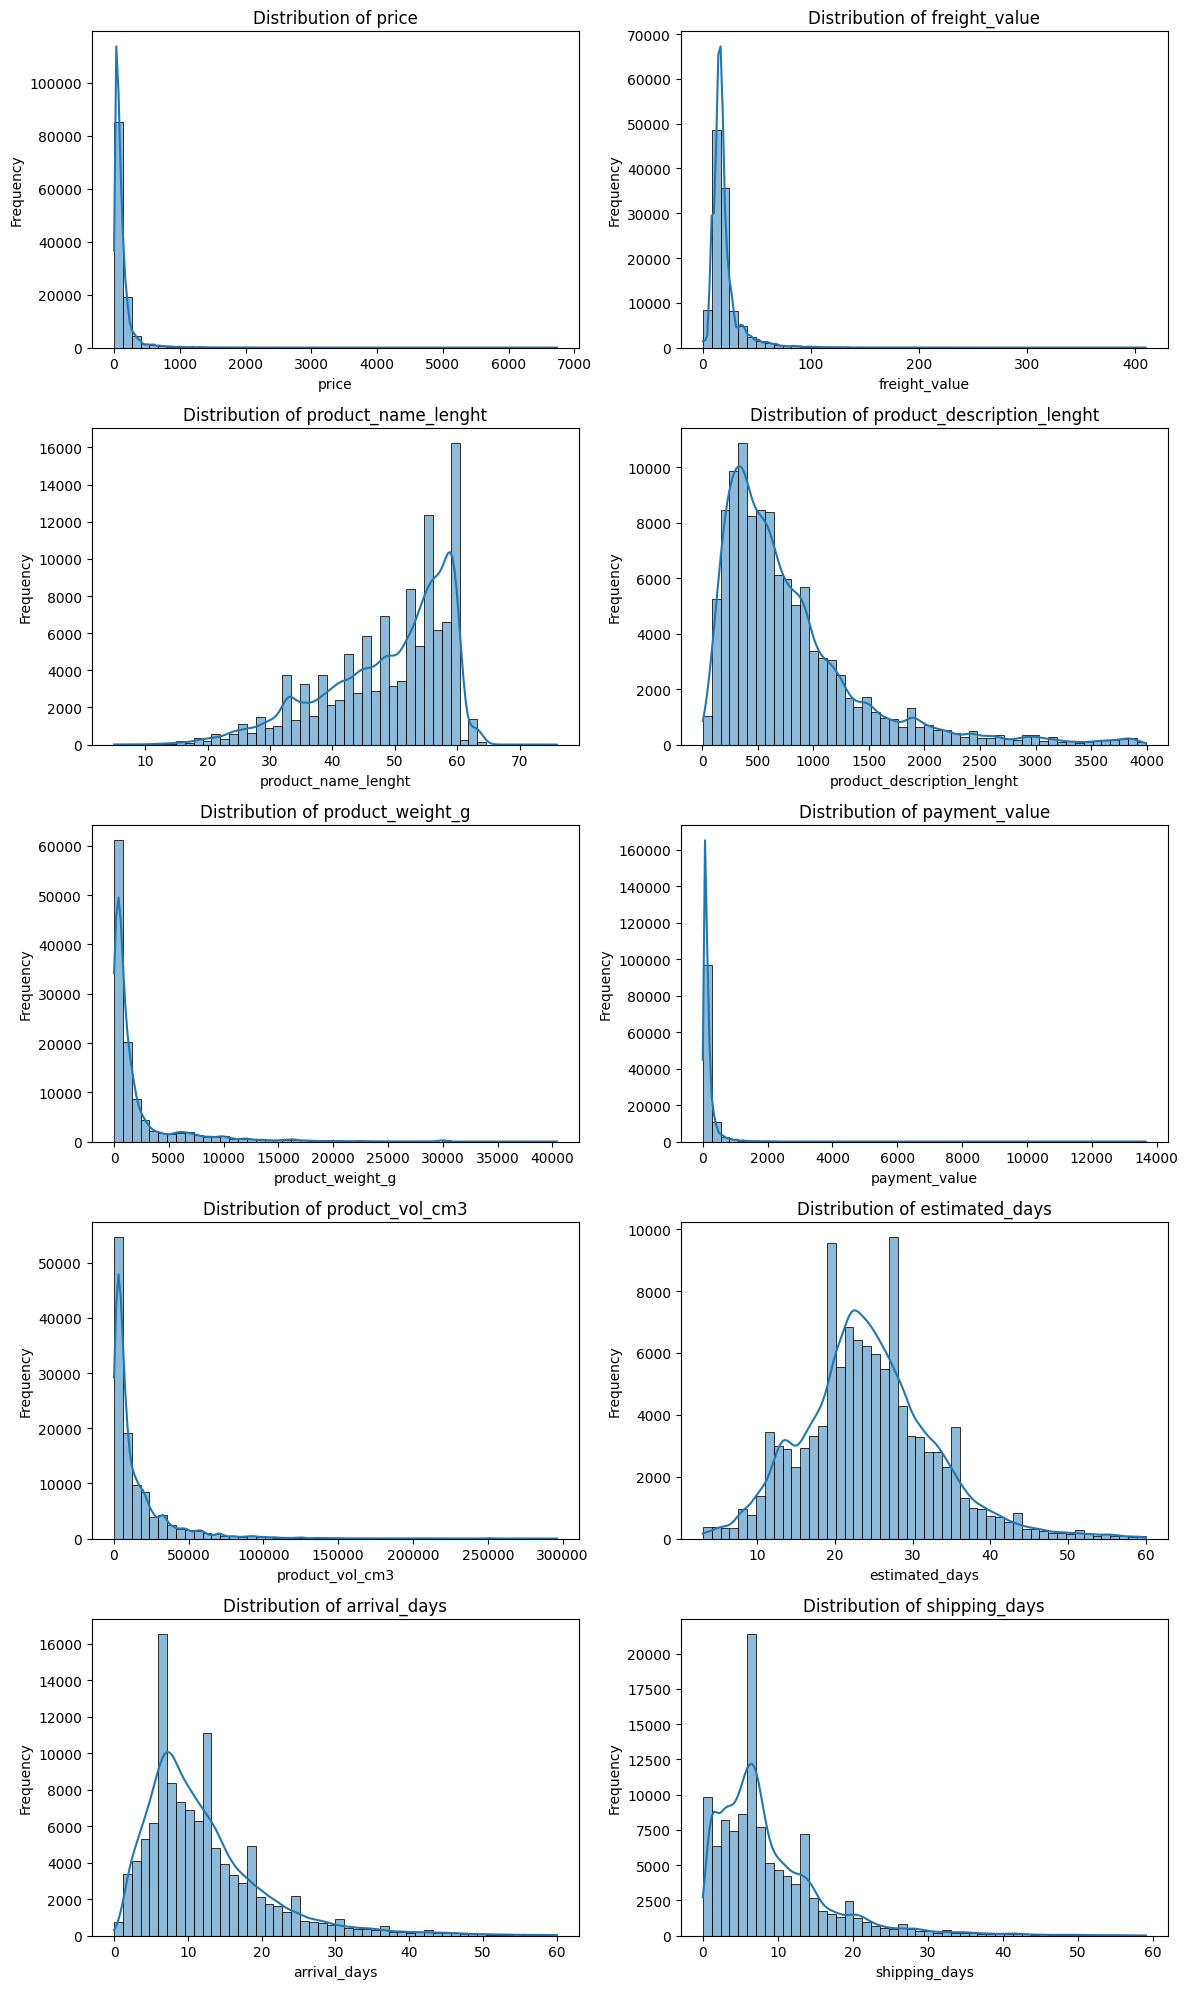

In [25]:
num_cols = len(continuous_columns)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(12, num_cols * 2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(continuous_columns):
    sns.histplot(df[column], bins=50, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Lets apply log transformation for highly skewed columns 'price','freight_value','product_weight_g','payment_value','product_vol_cm3' to have a better overview of the distribution. Log transformation can help in normalization, so this variable can maintain standard scale with other variables.

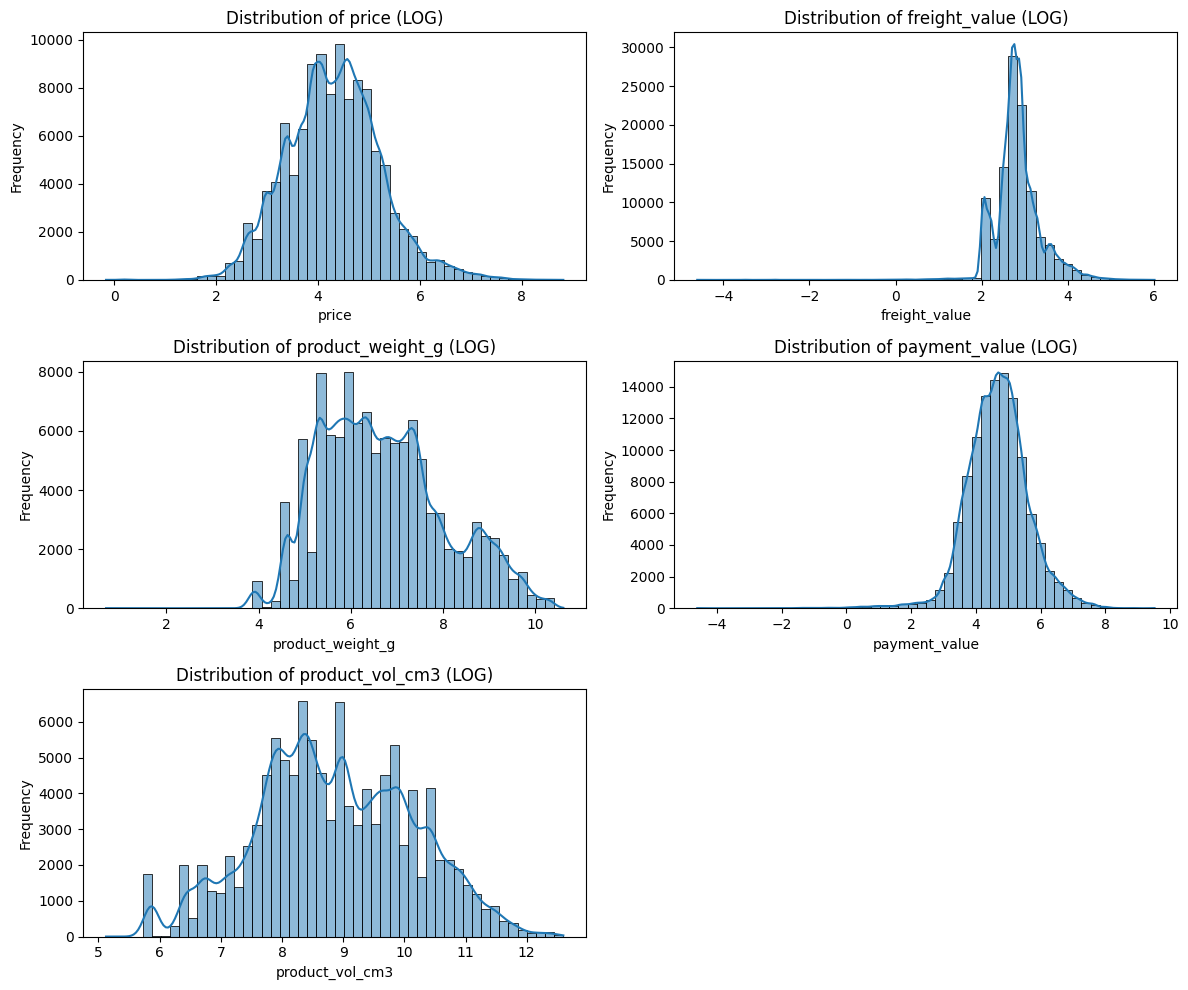

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(['price','freight_value','product_weight_g','payment_value','product_vol_cm3']):
    sns.histplot(np.log(df[column]), bins=50, kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {column} (LOG)')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [27]:
def identify_outliers_iqr(df, columns, threshold=1.5):

    for column in columns:
        # Calculate IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Find rows with values outside the IQR range
        outliers = df[(df[column] < (Q1 - threshold * IQR)) | (df[column] > (Q3 + threshold * IQR))]
        print('Outliers of {}'.format(column))
    return outliers


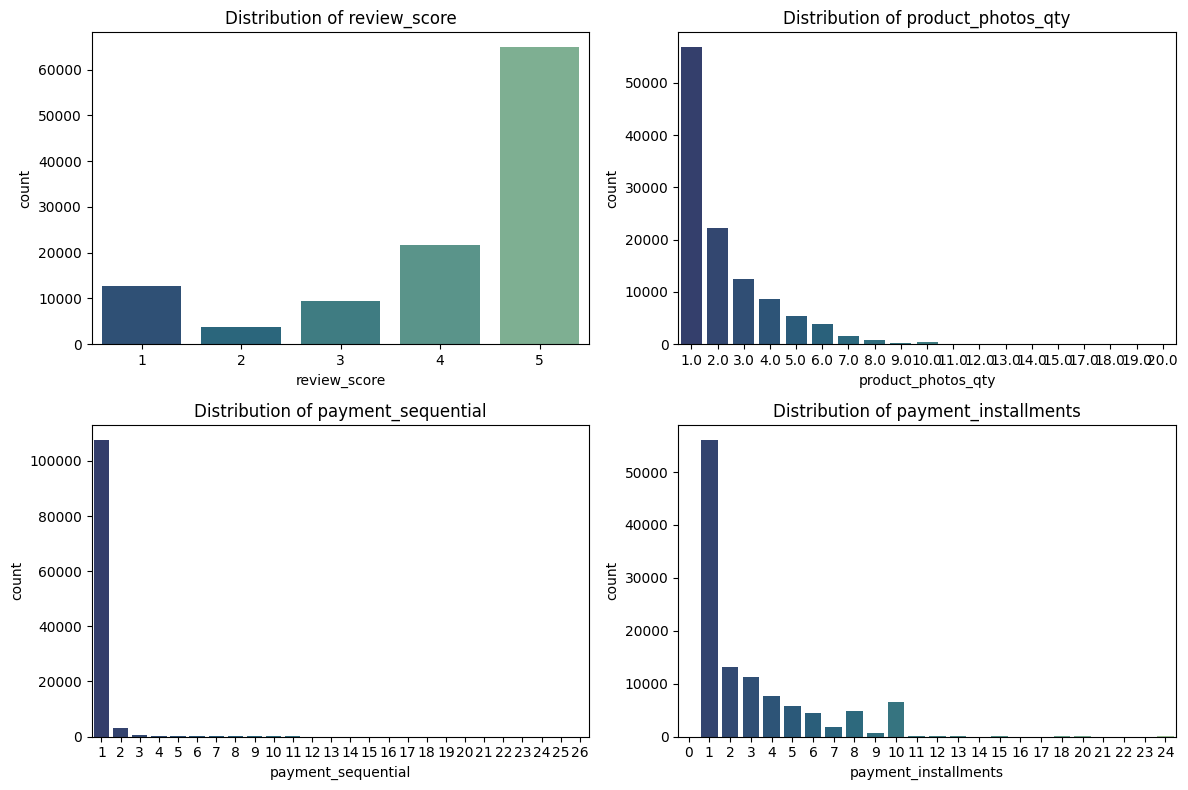

In [28]:
num_cols = len(discrete_columns)
fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(12, num_cols * 2))

axes = axes.flatten()

for i, column in enumerate(discrete_columns):
    sns.barplot(x = df[column].value_counts().index, y = df[column].value_counts().values, ax=axes[i], palette= 'crest_r')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('count')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Since no of installments can't be 0, we should drop these raws

In [29]:
# Drop indices
df.drop(df[df.payment_installments == 0].index, inplace=True)

# Reset Index
df.reset_index(inplace= True, drop= True) 

### Categorical columns

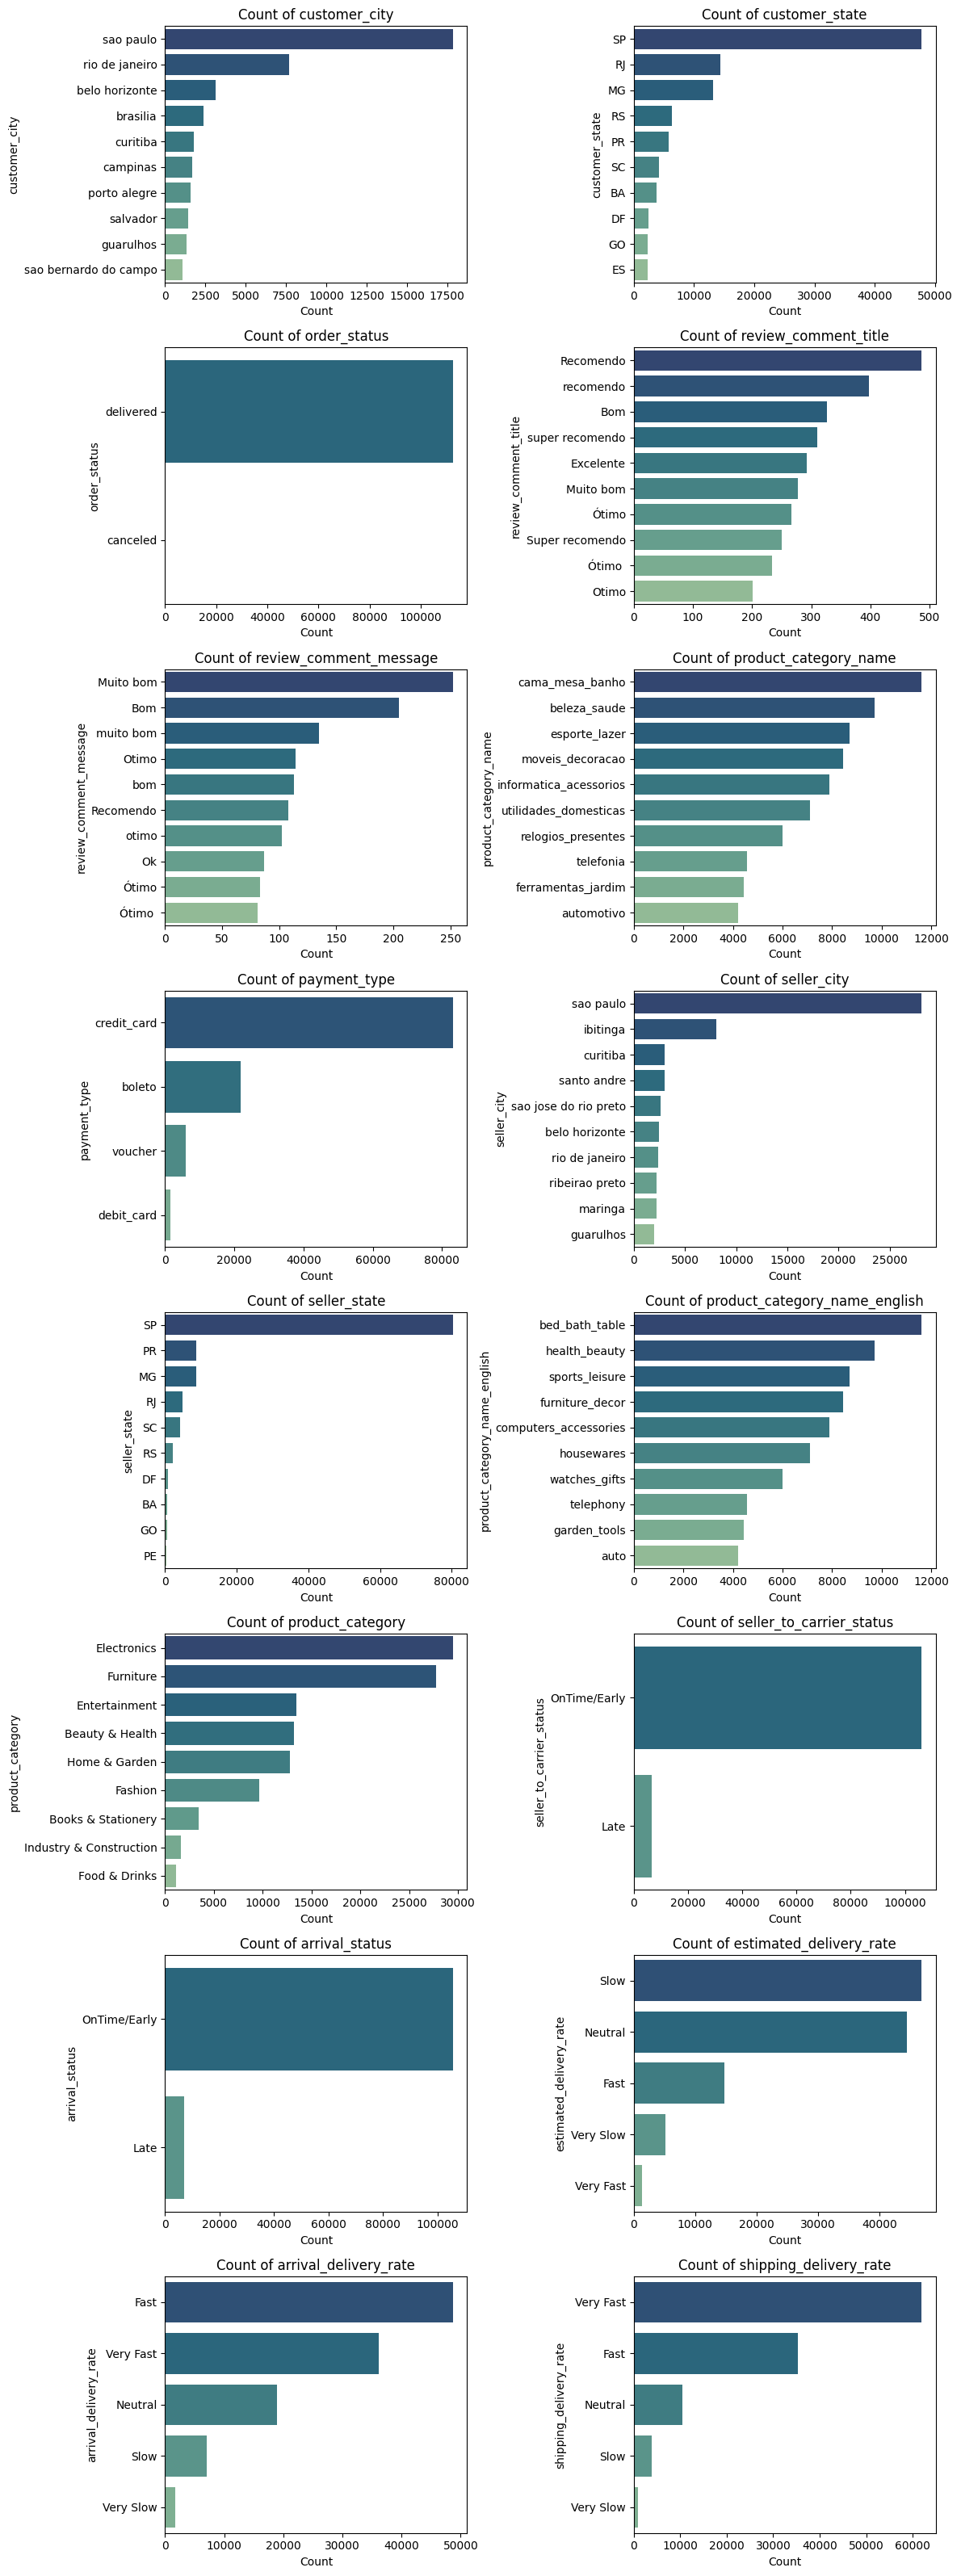

In [30]:
num_cols = len(categorical_columns)

fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(12, num_cols * 2))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.barplot(x = df[column].value_counts().values[:10], y = df[column].value_counts().index[:10], ax=axes[i], palette= 'crest_r')
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Due to the extreme imbalance and lack of variance in the 'order_status' feature, we should drop it

In [31]:
df.drop('order_status', axis=1, inplace=True)

### 4.2 Multivariate Analysis

As we know that the 'price' column is highly right skewed let's check if there is any relation to some product categories being high;y priced.

<Axes: xlabel='product_category', ylabel='price'>

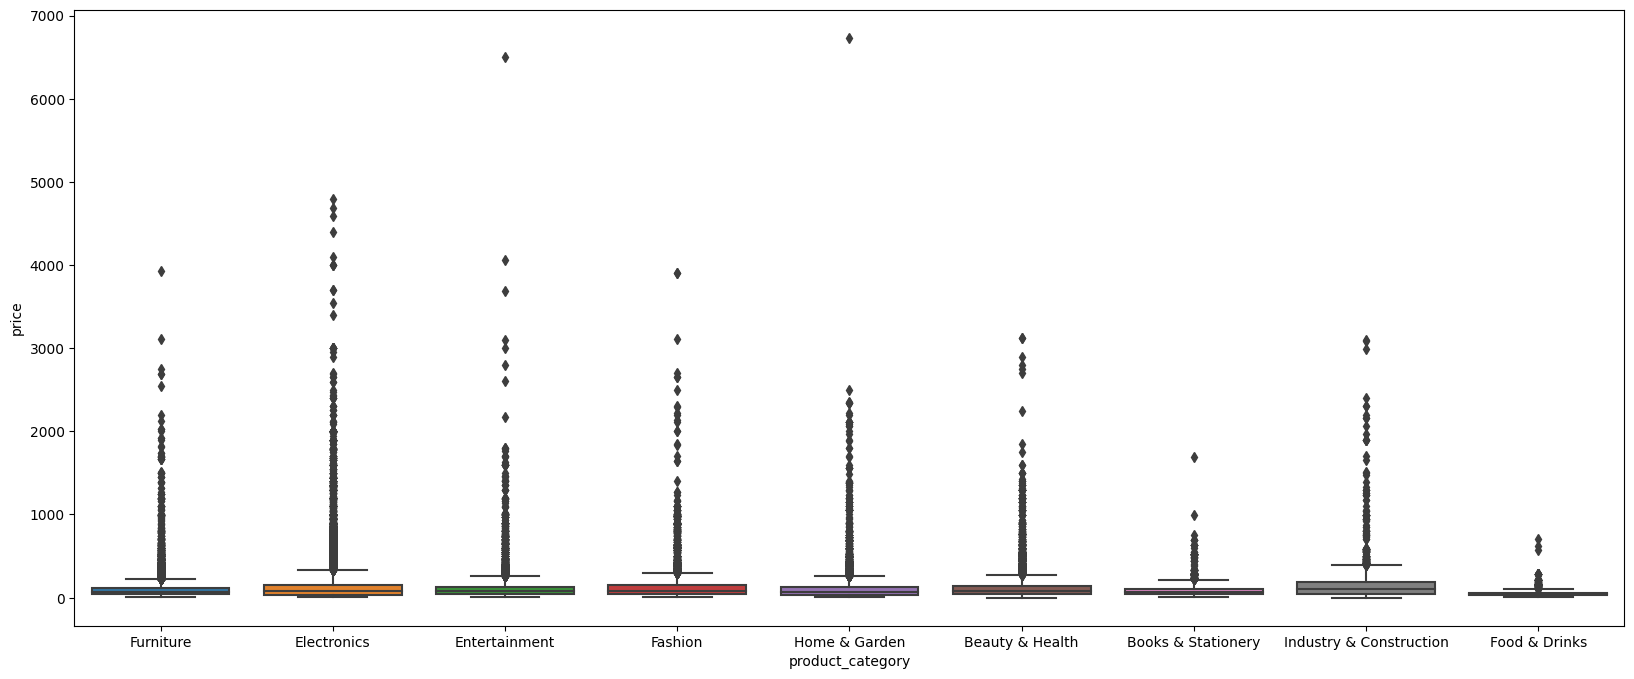

In [32]:
plt.figure(figsize=[20, 8])
sns.boxplot(x=df.product_category,y=df.price)

### Which Cities have highest Revenue ?

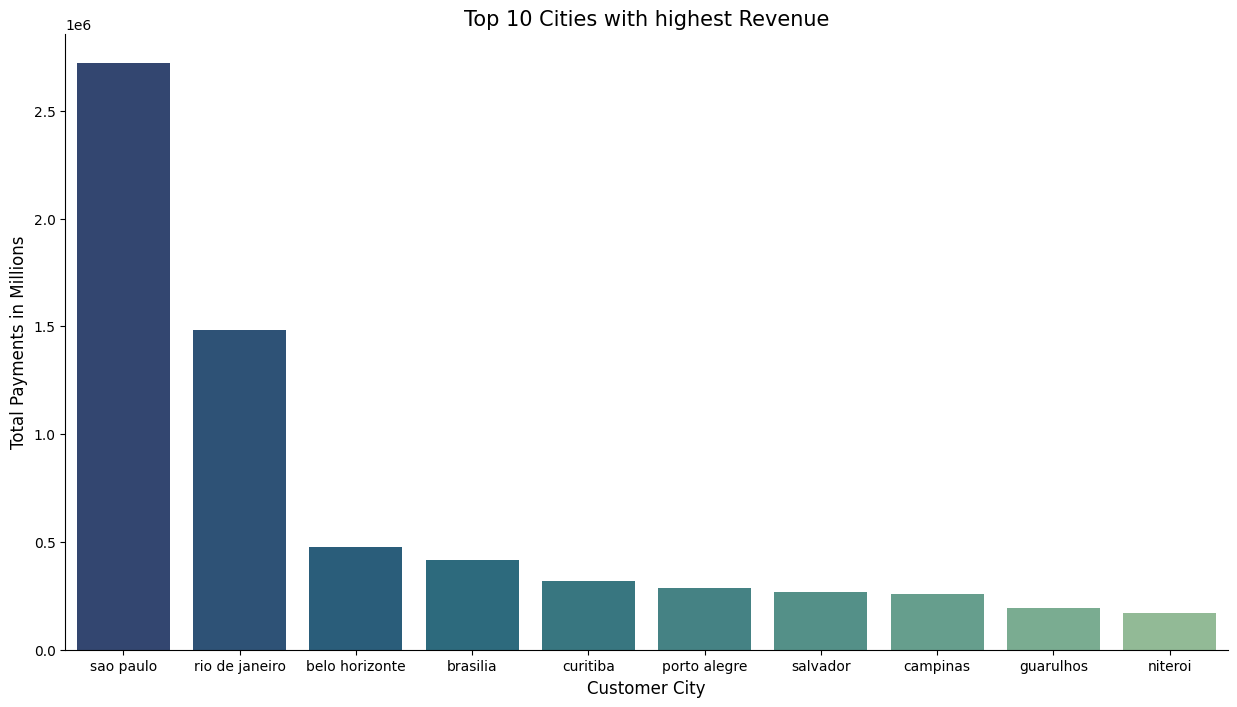

In [33]:
# Group customer city by payment value
revenue_per_city = df.groupby('customer_city')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
revenue_per_city.reset_index(inplace=True)

# plot Top 10 cities with highest revenue
plt.figure(figsize=[15, 8])
sns.barplot(x = revenue_per_city.customer_city[:10], y= revenue_per_city.payment_value[:10], palette= 'crest_r')
plt.title('Top 10 Cities with highest Revenue', fontsize= 15)
plt.xlabel('Customer City', fontsize= 12)
plt.ylabel('Total Payments in Millions',fontsize= 12)
sns.despine()



### What is the average review score for each product category ?

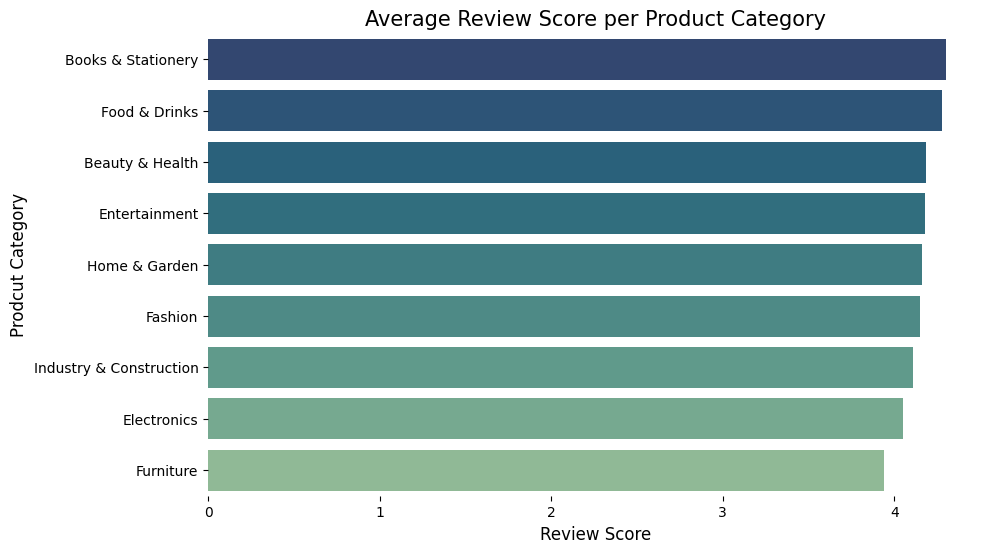

In [34]:
# Filter product category with 4.5 or above
review_per_cat = df.groupby('product_category')[['review_score']].mean().sort_values(by='review_score', ascending=False)
review_per_cat.reset_index(inplace=True)

# Plot Product Category vs Review Score
plt.figure(figsize=[10, 6])
sns.barplot(x = review_per_cat.review_score, y= review_per_cat.product_category, palette= 'crest_r')
plt.title('Average Review Score per Product Category', fontsize= 15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Prodcut Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### Are customers more likely to make larger payments using certain payment methods ?

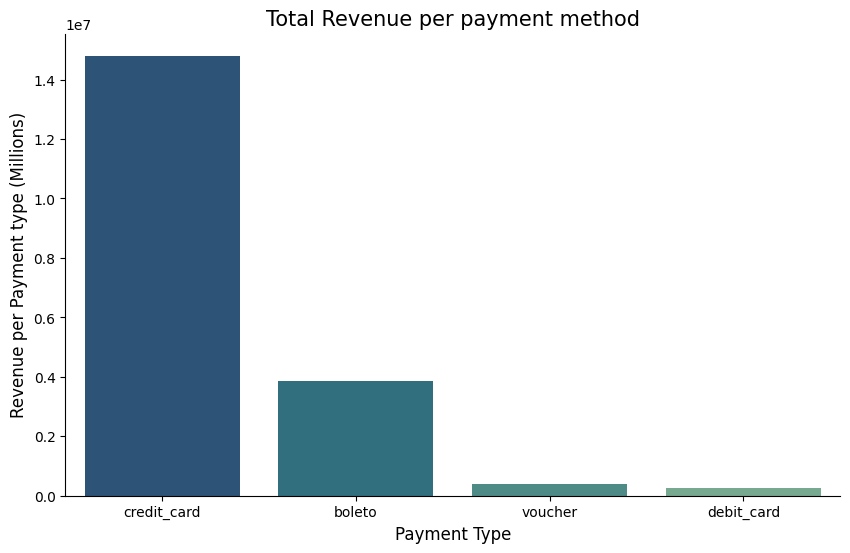

In [35]:
# Group each payment type by average payment value
payment_methods = df.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[10, 6])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)
sns.despine()

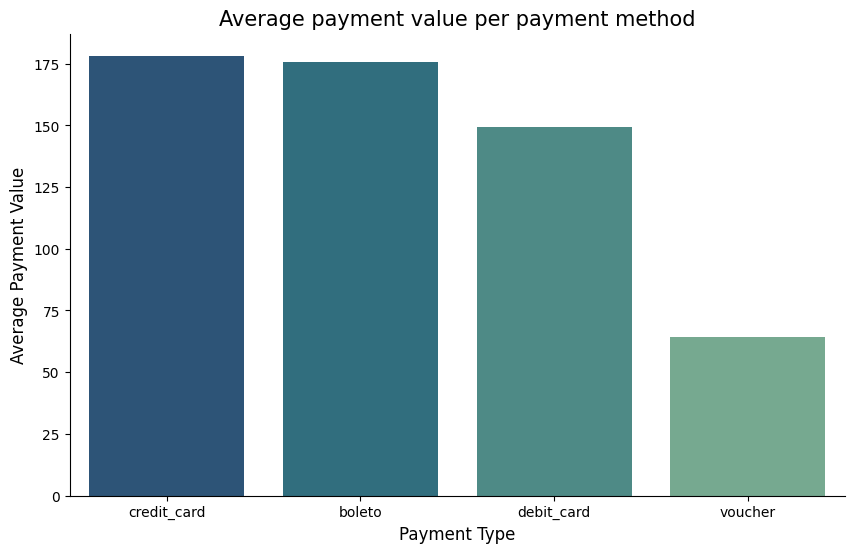

In [36]:
# Group each payment type by average payment value
payment_methods = df.groupby('payment_type')[['payment_value']].mean().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
plt.figure(figsize=[10, 6])
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Average payment value per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Average Payment Value', fontsize= 12)
sns.despine()

### What is the average freight value for each product category ?

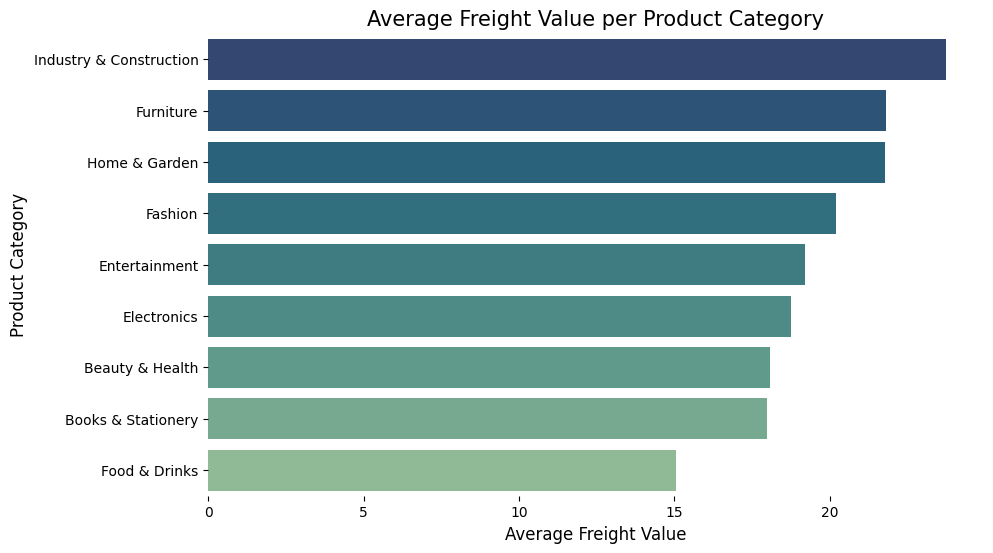

In [37]:
# Group product category by average freight value
freight_per_cat = df.groupby('product_category')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[10, 6])
sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category, palette= 'crest_r')
plt.title('Average Freight Value per Product Category', fontsize= 15)
plt.xlabel('Average Freight Value',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### What is the average shipping time for each product Category ?

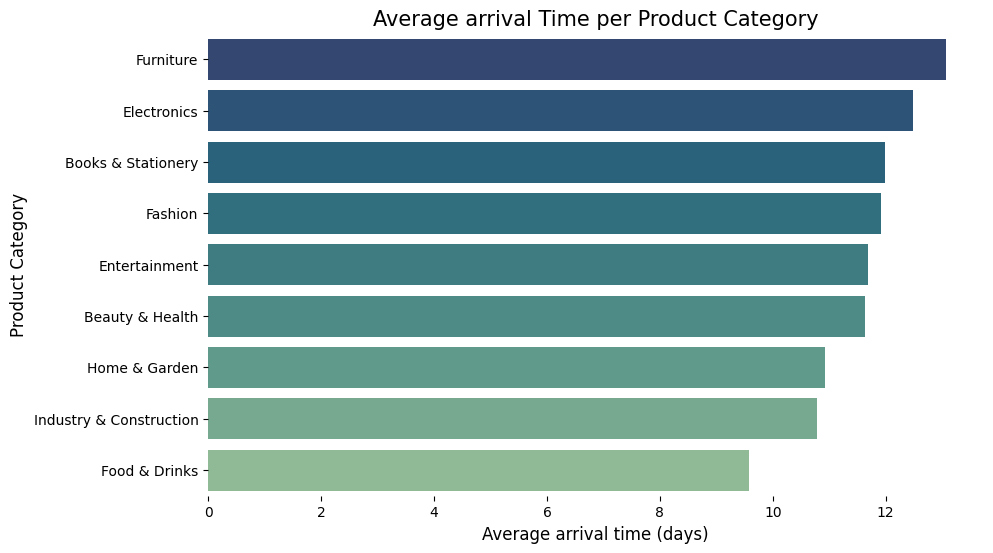

In [38]:
# Group product category by average arrival time
ship_per_cat = df.groupby('product_category')[['arrival_days']].mean().sort_values(by='arrival_days', ascending=False)
ship_per_cat.reset_index(inplace=True)

# plot average freight value per product category
plt.figure(figsize=[10, 6])
sns.barplot(x = ship_per_cat.arrival_days, y=  ship_per_cat.product_category, palette= 'crest_r')
plt.title('Average arrival Time per Product Category', fontsize= 15)
plt.xlabel('Average arrival time (days)',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

### Distribution of products categories by location ?

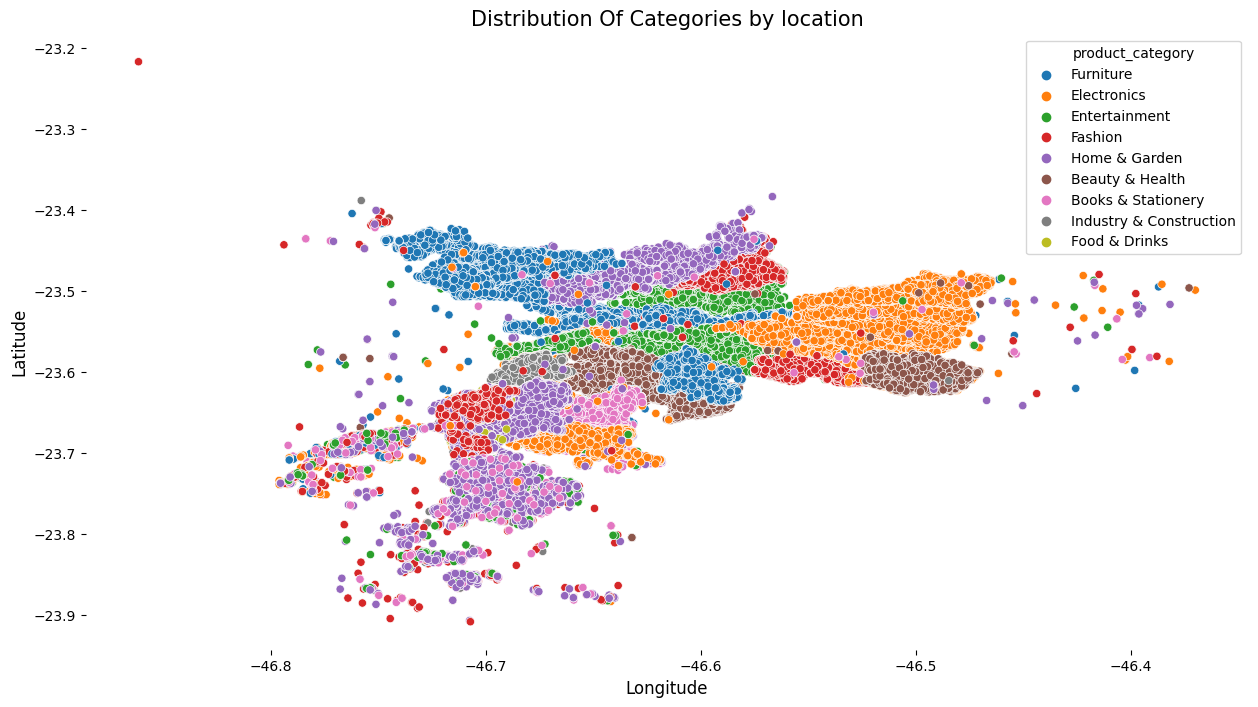

In [39]:
plt.figure(figsize=[15, 8])
sns.scatterplot(x = geolocation_df.geolocation_lng, y = geolocation_df.geolocation_lat, hue= df.product_category)
plt.title('Distribution Of Categories by location', fontsize= 15)
plt.xlabel('Longitude',fontsize= 12)
plt.ylabel('Latitude', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False)
sns.despine()

In [42]:
# Create copy of DataFrame
df_2 = df.copy()

# Save sample for EDA Deployment
EDA_df = df_2.drop(['customer_id', 'customer_unique_id', 'order_id', 'review_id', 'order_item_id', 'product_id', 'seller_id', 'product_category_name'], axis= 1)
EDA_sample = EDA_df.sample(frac= 1)[:10000]
EDA_sample.to_csv('EDA.csv')

# 5.0 Data Preprocessing

### 5.1 Drop Unneccessary Features

In [ ]:
# Drop all ids, zip codes, datetimes, review comment and title, product length

df.drop(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 'order_id', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
        'review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
        'order_item_id', 'product_id', 'seller_id', 'seller_city', 'seller_state', 'shipping_limit_date', 'product_category_name',
        'product_category_name_english', 'product_category', 'product_weight_g', 'product_name_lenght',
        'product_vol_cm3'], axis= 1, inplace= True)

<Axes: >

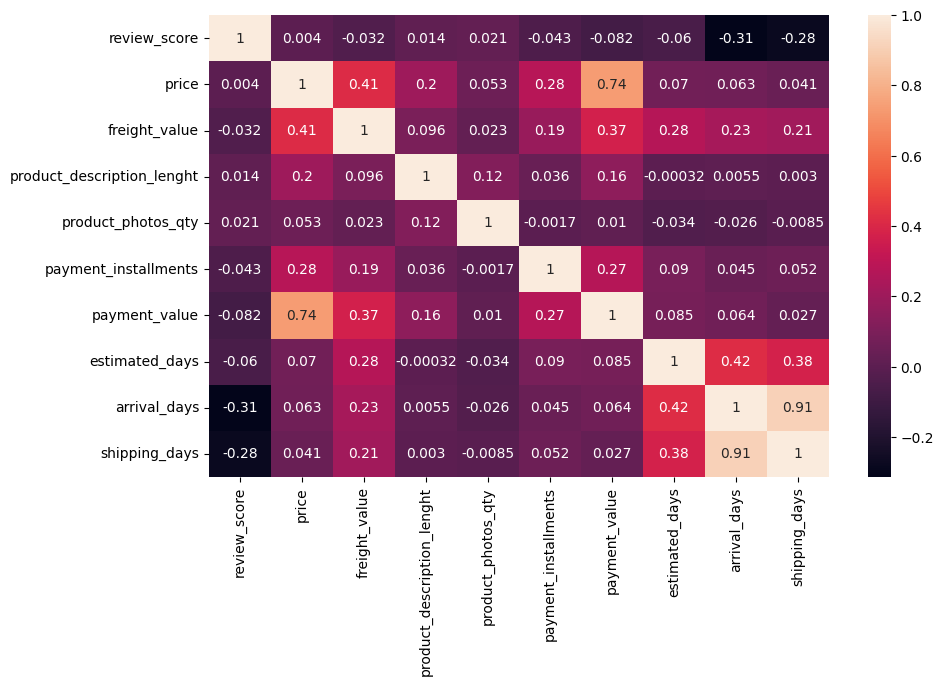

In [46]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])

# Show Correlation between Features
plt.figure(figsize= [10, 6])
sns.heatmap(numerical_df.corr(), annot=True)


In [47]:
# Remove redundant features with multicolinearity correlations
df.drop(['shipping_days', 'price'], axis= 1, inplace= True)

In [48]:
df.head()

review_score  freight_value  product_description_lenght  \
0             4          21.88                      1141.0   
1             1          24.90                      1141.0   
2             1          24.90                      1141.0   
3             3          15.62                      1141.0   
4             4          30.59                      1141.0   

   product_photos_qty payment_type  payment_installments  payment_value  \
0                 1.0  credit_card                     2         146.87   
1                 1.0  credit_card                     1         275.79   
2                 1.0  credit_card                     1         275.79   
3                 1.0  credit_card                     7         140.61   
4                 1.0  credit_card                    10         137.58   

   estimated_days  arrival_days seller_to_carrier_status arrival_status  \
0              20             9                     Late   OnTime/Early   
1              40            19             OnTime/Early   OnTime/Early   
2              40            19             OnTime/Early   OnTime/Early   
3              36            19             OnTime/Early   OnTime/Early   
4              47            25                     Late   OnTime/Early   

  estimated_delivery_rate arrival_delivery_rate shipping_delivery_rate  
0                 Neutral                  Fast              Very Fast  
1               Very Slow               Neutral              Very Fast  
2               Very Slow               Neutral              Very Fast  
3                    Slow               Neutral              Very Fast  
4               Very Slow                  Slow                   Fast

#### Convert Review Score from Multiclass to Binary

In [49]:
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

df['review_score'] = df['review_score'].map(encoded_class)

#### Split Data into Input Features & Target Variable

In [50]:
X = df.drop('review_score', axis=1)
y = df['review_score']

### 5.2 Handling Categorical Features

#### Handling Ordinal Features ( Label Encoding)

In [51]:
labels = {'Very Slow' : 1, 
          'Slow' : 2, 
          'Neutral' : 3, 
          'Fast' : 4, 
          'Very Fast' : 5}

X.estimated_delivery_rate = X.estimated_delivery_rate.map(labels)
X.shipping_delivery_rate = X.shipping_delivery_rate.map(labels)
X.arrival_delivery_rate = X.arrival_delivery_rate.map(labels)

#### Handling Nominal Features ( One Hot Encoding )

In [52]:
X = pd.get_dummies(X, drop_first=True)

#### Split Data into Train & Test

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify= y)

### 5.3 Feature Selection

In [54]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 'all')
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

##### Plotting Featres as per importance

<Axes: >

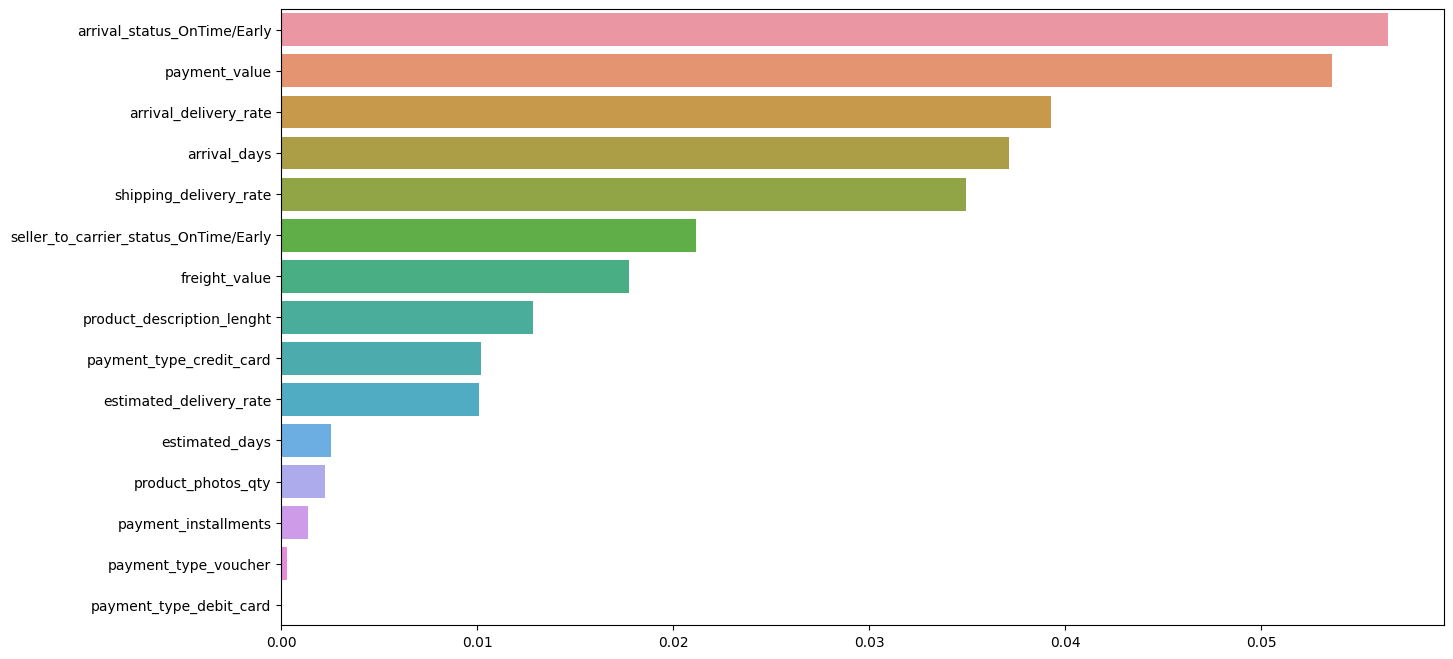

In [55]:
# Get the indices sorted by most important to least important
plt.figure(figsize=[15, 8])
indices = np.argsort(fs.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(15):
    features.append(fs.feature_names_in_[indices[i]])

# Now plot
sns.barplot(x = fs.scores_[indices[range(15)]], y = features)

#### Select best 9 Features

In [56]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
fs = SelectKBest(mutual_info_classif, k= 9)
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [57]:
x_train_fs = pd.DataFrame(x_train_fs, columns= fs.get_feature_names_out())
x_test_fs = pd.DataFrame(x_test_fs, columns= fs.get_feature_names_out())

### 5.4 Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

##### Convert Array to Dataframe

In [59]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= sc.get_feature_names_out())
x_test_scaled = pd.DataFrame(x_test_scaled, columns= sc.get_feature_names_out())

### 5.5 Handling Imbalance

##### Check imbalance percentage

In [60]:
round((y_train.value_counts() / y_train.shape[0]) * 100, 2)

review_score
Satisfied        76.99
Not Satisfied    23.01
Name: count, dtype: float64

##### Use SMOTE for handling imbalance

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# 6.0 Modeling

### 6.1 Apply ML Models

### Logistic Regression

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.69      0.42      0.52     69309
    Satisfied       0.58      0.81      0.68     69309

     accuracy                           0.62    138618
    macro avg       0.64      0.62      0.60    138618
 weighted avg       0.64      0.62      0.60    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.40      0.43      0.41      5179
    Satisfied       0.83      0.81      0.82     17327

     accuracy                           0.72     22506
    macro avg       0.61      0.62      0.62     22506
 weighted avg       0.73      0.72      0.72     22506



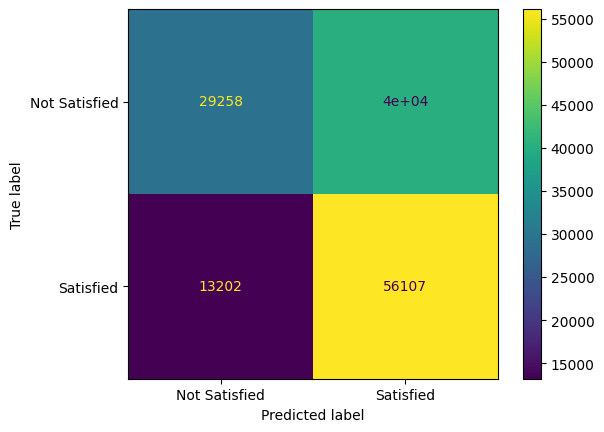

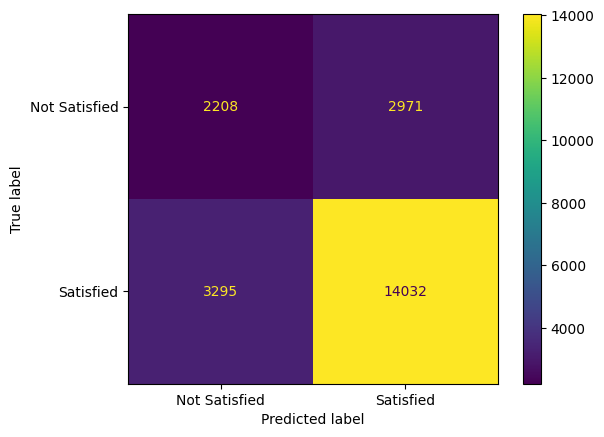

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

lr = LogisticRegression()
lr.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, lr.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lr.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(lr, x_train_resampled, y_train_resampled)
ConfusionMatrixDisplay.from_estimator(lr, x_test_scaled, y_test)
plt.show()

### KNN Classifier

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.82      0.94      0.88     69309
    Satisfied       0.93      0.79      0.86     69309

     accuracy                           0.87    138618
    macro avg       0.88      0.87      0.87    138618
 weighted avg       0.88      0.87      0.87    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.37      0.59      0.46      5179
    Satisfied       0.85      0.70      0.77     17327

     accuracy                           0.67     22506
    macro avg       0.61      0.65      0.61     22506
 weighted avg       0.74      0.67      0.70     22506



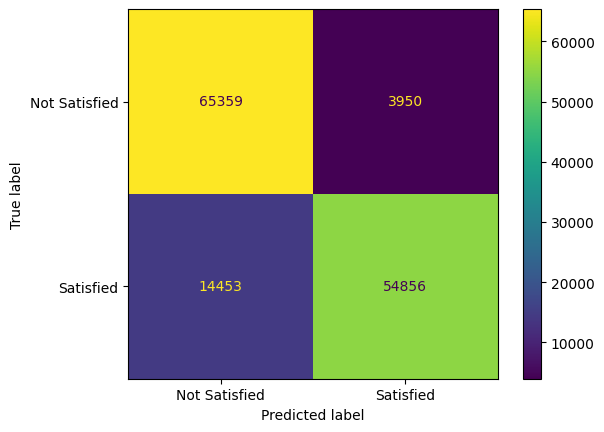

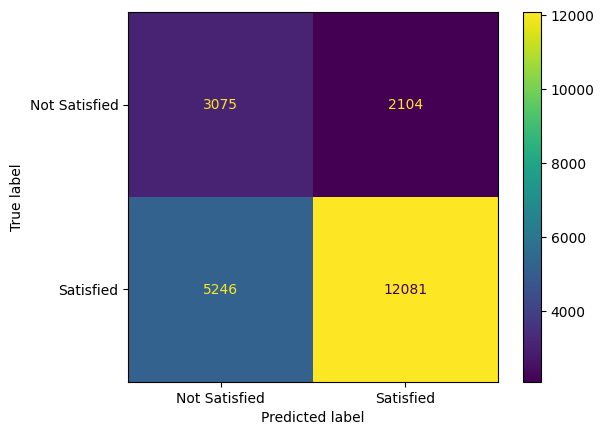

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, knn.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, knn.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(knn,x_train_resampled,y_train_resampled)
ConfusionMatrixDisplay.from_estimator(knn, x_test_scaled, y_test)

### Decision Tree

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.99      1.00      1.00     69309
    Satisfied       1.00      0.99      1.00     69309

     accuracy                           1.00    138618
    macro avg       1.00      1.00      1.00    138618
 weighted avg       1.00      1.00      1.00    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.43      0.54      0.48      5179
    Satisfied       0.85      0.79      0.82     17327

     accuracy                           0.73     22506
    macro avg       0.64      0.66      0.65     22506
 weighted avg       0.75      0.73      0.74     22506



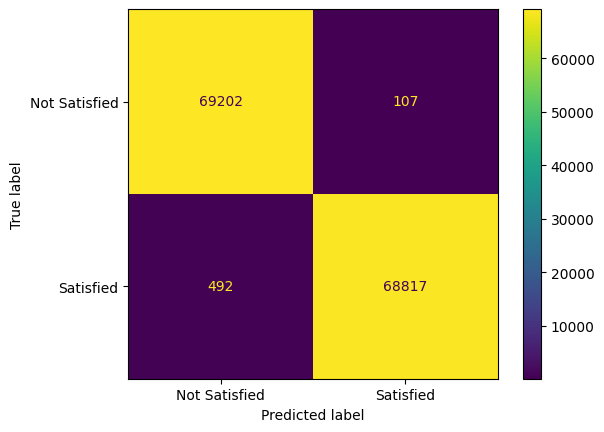

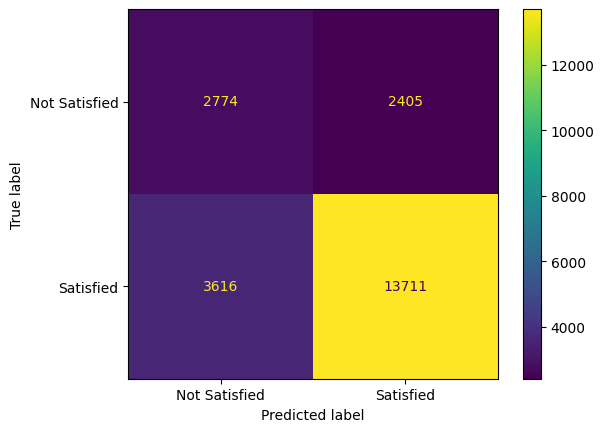

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, dt.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, dt.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(dt,x_train_resampled,y_train_resampled)
ConfusionMatrixDisplay.from_estimator(dt, x_test_scaled, y_test)

### Random Forest

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       1.00      0.99      1.00     69309
    Satisfied       0.99      1.00      1.00     69309

     accuracy                           1.00    138618
    macro avg       1.00      1.00      1.00    138618
 weighted avg       1.00      1.00      1.00    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.59      0.50      0.54      5179
    Satisfied       0.86      0.90      0.88     17327

     accuracy                           0.80     22506
    macro avg       0.72      0.70      0.71     22506
 weighted avg       0.79      0.80      0.80     22506



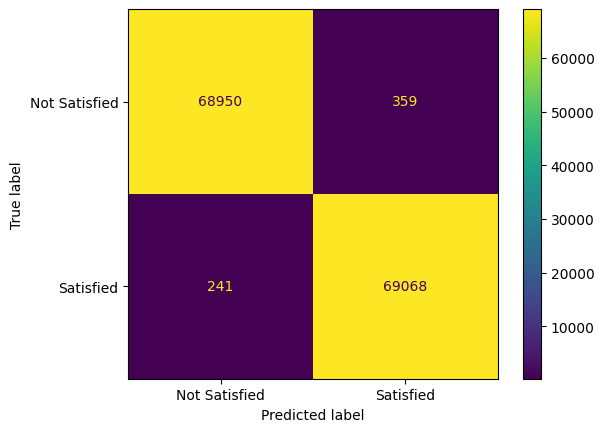

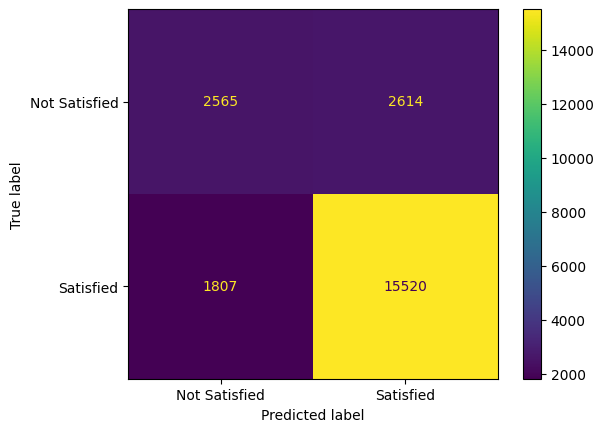

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, rf.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, rf.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(rf, x_train_resampled, y_train_resampled)
ConfusionMatrixDisplay.from_estimator(rf, x_test_scaled, y_test)

### Ada Boost

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.69      0.49      0.57     69309
    Satisfied       0.60      0.78      0.68     69309

     accuracy                           0.63    138618
    macro avg       0.65      0.63      0.63    138618
 weighted avg       0.65      0.63      0.63    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.38      0.46      0.42      5179
    Satisfied       0.83      0.78      0.80     17327

     accuracy                           0.71     22506
    macro avg       0.61      0.62      0.61     22506
 weighted avg       0.73      0.71      0.72     22506



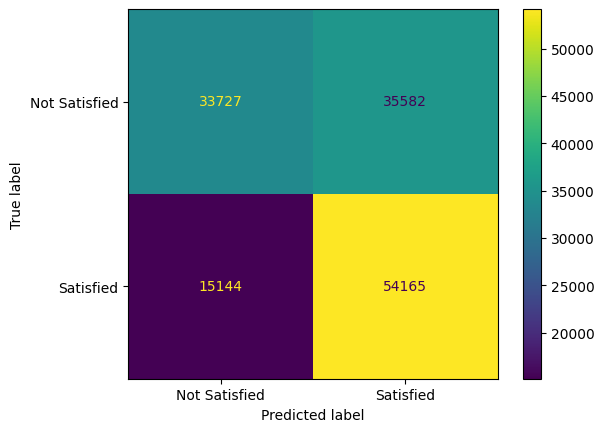

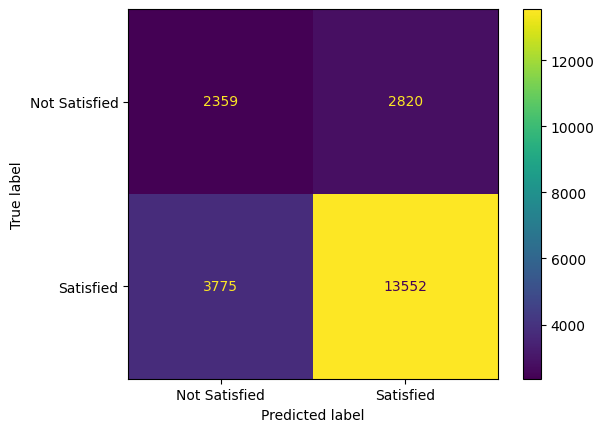

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()
ad.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, ad.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, ad.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(ad, x_train_resampled, y_train_resampled)
ConfusionMatrixDisplay.from_estimator(ad, x_test_scaled, y_test)

### XGboost

Evaluation on Training 
               precision    recall  f1-score   support

           0       0.84      0.64      0.72     69309
           1       0.71      0.88      0.78     69309

    accuracy                           0.76    138618
   macro avg       0.77      0.76      0.75    138618
weighted avg       0.77      0.76      0.75    138618

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.47      0.43      0.45      5179
           1       0.83      0.86      0.84     17327

    accuracy                           0.76     22506
   macro avg       0.65      0.64      0.65     22506
weighted avg       0.75      0.76      0.75     22506



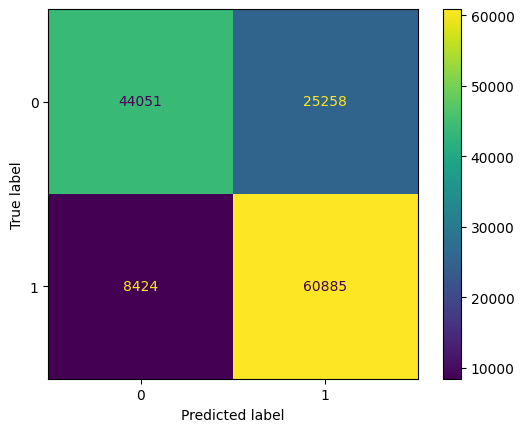

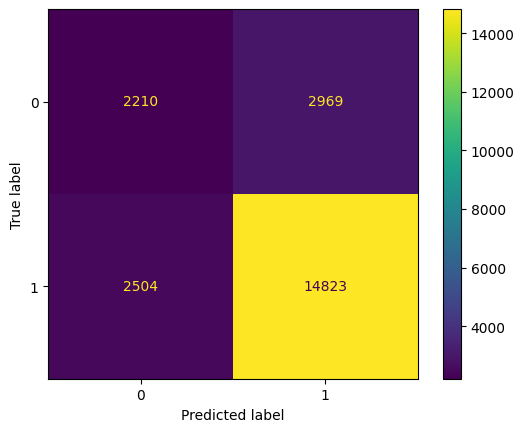

In [67]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_xg = le.fit_transform(y_train_resampled)
y_test_xg = le.fit_transform(y_test)
xg = XGBClassifier()
xg.fit(x_train_resampled, y_train_xg)

print('Evaluation on Training \n', classification_report(y_train_xg, xg.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, xg.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(xg, x_train_resampled, y_train_xg)
ConfusionMatrixDisplay.from_estimator(xg, x_test_scaled, y_test_xg)

### Naive Bayes

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.72      0.35      0.47     69309
    Satisfied       0.57      0.86      0.69     69309

     accuracy                           0.61    138618
    macro avg       0.65      0.61      0.58    138618
 weighted avg       0.65      0.61      0.58    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.44      0.36      0.39      5179
    Satisfied       0.82      0.86      0.84     17327

     accuracy                           0.75     22506
    macro avg       0.63      0.61      0.62     22506
 weighted avg       0.73      0.75      0.74     22506



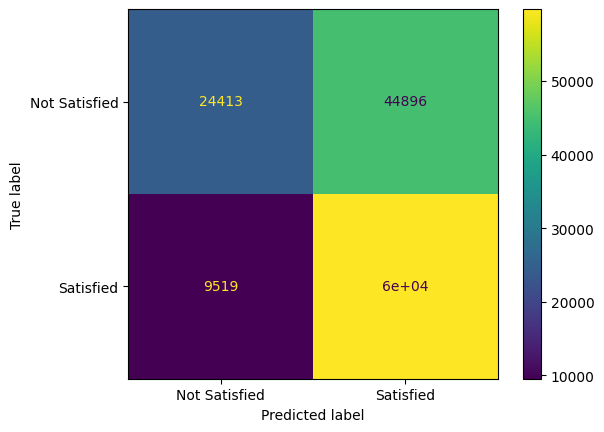

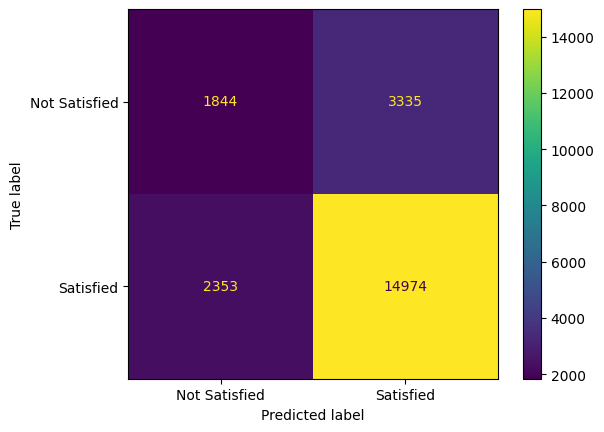

In [68]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train_resampled, y_train_resampled)
y_pred = nb.predict(x_test_scaled)

print('Evaluation on Training \n', classification_report(y_train_resampled, nb.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(nb, x_train_resampled, y_train_resampled)
ConfusionMatrixDisplay.from_estimator(nb, x_test_scaled, y_test)

### LightGBM

[LightGBM] [Info] Number of positive: 69309, number of negative: 69309
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1558
[LightGBM] [Info] Number of data points in the train set: 138618, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.88      0.56      0.69     69309
    Satisfied       0.68      0.92      0.78     69309

     accuracy                           0.74    138618
    macro avg       0.78      0.74      0.73    138618
 weighted avg       0.78      0.74      0.73    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.54      0.34      0.42      5179
    

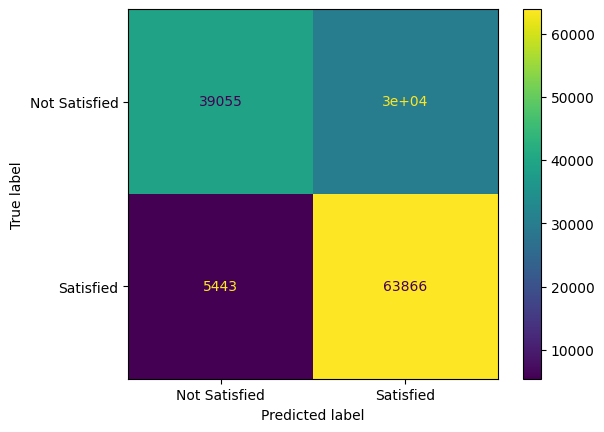

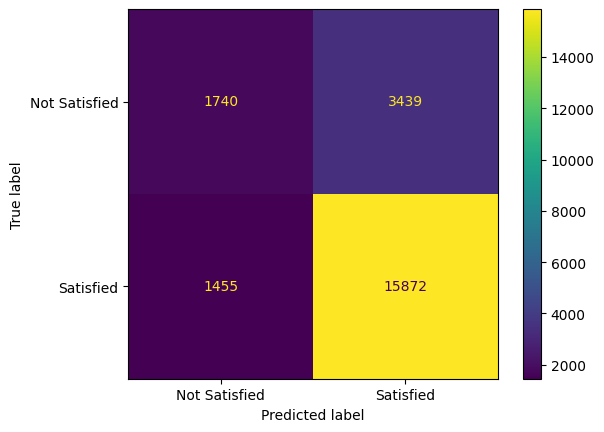

In [69]:
import lightgbm as ltb

lg = ltb.LGBMClassifier()
lg.fit(x_train_resampled, y_train_resampled)

print('Evaluation on Training \n', classification_report(y_train_resampled, lg.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, lg.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(lg, x_train_resampled, y_train_resampled)
ConfusionMatrixDisplay.from_estimator(lg, x_test_scaled, y_test)

### CatBoost

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.90      0.63      0.74     69309
    Satisfied       0.71      0.93      0.81     69309

     accuracy                           0.78    138618
    macro avg       0.81      0.78      0.77    138618
 weighted avg       0.81      0.78      0.77    138618

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.56      0.35      0.43      5179
    Satisfied       0.83      0.92      0.87     17327

     accuracy                           0.79     22506
    macro avg       0.70      0.64      0.65     22506
 weighted avg       0.77      0.79      0.77     22506



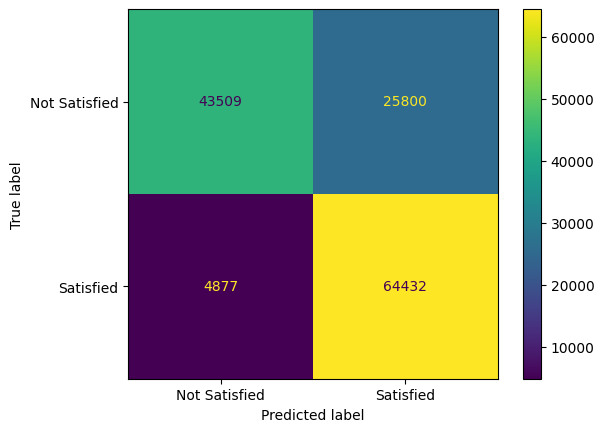

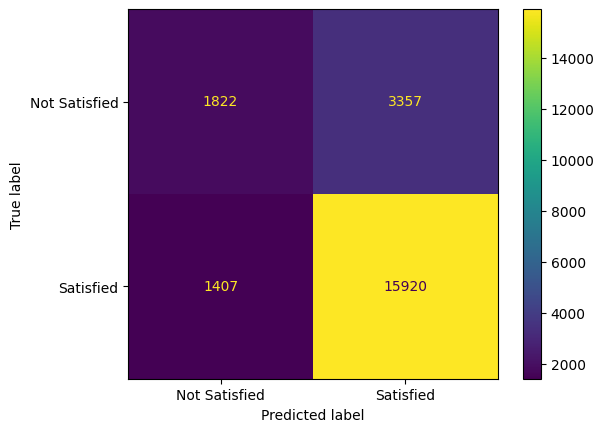

In [70]:
import catboost as cb

cb = cb.CatBoostClassifier()
cb.fit(x_train_resampled, y_train_resampled, verbose=0)

print('Evaluation on Training \n', classification_report(y_train_resampled, cb.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test, cb.predict(x_test_scaled)))

ConfusionMatrixDisplay.from_estimator(cb, x_train_resampled, y_train_resampled)
ConfusionMatrixDisplay.from_estimator(cb, x_test_scaled, y_test)

### 6.2 Hyperparameter Tuning

#### XGboost

In [71]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'learning_rate': [0.1, 0.2],
#     'max_depth': [5, 7, 8],
#     'n_estimators': [100, 200] 
#     }
# grid_search = GridSearchCV(xg, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
# grid_search.fit(x_train_resampled, y_train_xg)
# grid_search.best_params_

In [72]:
final_xg_model = XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200)
final_xg_model.fit(x_train_resampled, y_train_xg, verbose=0)

print('Evaluation on Training \n', classification_report(y_train_xg, final_xg_model.predict(x_train_resampled)))
print('Evaluation on Testing \n', classification_report(y_test_xg, final_xg_model.predict(x_test_scaled)))

Evaluation on Training 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82     69309
           1       0.79      0.92      0.85     69309

    accuracy                           0.84    138618
   macro avg       0.85      0.84      0.84    138618
weighted avg       0.85      0.84      0.84    138618

Evaluation on Testing 
               precision    recall  f1-score   support

           0       0.51      0.46      0.48      5179
           1       0.84      0.87      0.85     17327

    accuracy                           0.77     22506
   macro avg       0.68      0.66      0.67     22506
weighted avg       0.77      0.77      0.77     22506



In [73]:
# param_grid = {
#     'learning_rate': [0.1, 0.2],
#     'depth': [5, 7, 8],
#     'iterations': [100, 200]}

# grid_search = GridSearchCV(cb, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
# grid_search.fit(x_train_resampled, y_train_resampled, verbose=0)
# grid_search.best_params_ 

In [74]:
import catboost as cb
final_cb_model = cb.CatBoostClassifier(depth= 8, iterations= 200, learning_rate= 0.2)
final_cb_model.fit(x_train_resampled,y_train_resampled, verbose=0)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_cb_model.predict(x_train_resampled)))
print('Evaluation on Training \n', classification_report(y_test, final_cb_model.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.90      0.61      0.73     69309
    Satisfied       0.71      0.93      0.80     69309

     accuracy                           0.77    138618
    macro avg       0.80      0.77      0.77    138618
 weighted avg       0.80      0.77      0.77    138618

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.57      0.34      0.43      5179
    Satisfied       0.82      0.92      0.87     17327

     accuracy                           0.79     22506
    macro avg       0.70      0.63      0.65     22506
 weighted avg       0.76      0.79      0.77     22506



#### RandomForest

In [75]:
# param_grid = {
#     'max_depth': [8, 9, 10],
#     'n_estimators': [100, 200]
#     }
# grid_search = GridSearchCV(rf, param_grid= param_grid, cv= 5, scoring= 'f1_macro')
# grid_search.fit(x_train_resampled, y_train_resampled)
# grid_search.best_params_

In [76]:
final_rf_model = RandomForestClassifier(n_estimators= 100, max_depth= 10)
final_rf_model.fit(x_train_resampled,y_train_resampled)
print('Evaluation on Training \n', classification_report(y_train_resampled, final_rf_model.predict(x_train_resampled)))
print('Evaluation on Training \n', classification_report(y_test, final_rf_model.predict(x_test_scaled)))

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.79      0.54      0.64     69309
    Satisfied       0.65      0.86      0.74     69309

     accuracy                           0.70    138618
    macro avg       0.72      0.70      0.69    138618
 weighted avg       0.72      0.70      0.69    138618

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.45      0.42      0.43      5179
    Satisfied       0.83      0.85      0.84     17327

     accuracy                           0.75     22506
    macro avg       0.64      0.63      0.64     22506
 weighted avg       0.74      0.75      0.74     22506



#### Select XGboost for pipeline as it provides highest performance on testing

# 7.0 Pipeline

In [77]:
df_pipeline = df.copy()
df_pipeline.head()

review_score  freight_value  product_description_lenght  \
0      Satisfied          21.88                      1141.0   
1  Not Satisfied          24.90                      1141.0   
2  Not Satisfied          24.90                      1141.0   
3  Not Satisfied          15.62                      1141.0   
4      Satisfied          30.59                      1141.0   

   product_photos_qty payment_type  payment_installments  payment_value  \
0                 1.0  credit_card                     2         146.87   
1                 1.0  credit_card                     1         275.79   
2                 1.0  credit_card                     1         275.79   
3                 1.0  credit_card                     7         140.61   
4                 1.0  credit_card                    10         137.58   

   estimated_days  arrival_days seller_to_carrier_status arrival_status  \
0              20             9                     Late   OnTime/Early   
1              40            19             OnTime/Early   OnTime/Early   
2              40            19             OnTime/Early   OnTime/Early   
3              36            19             OnTime/Early   OnTime/Early   
4              47            25                     Late   OnTime/Early   

  estimated_delivery_rate arrival_delivery_rate shipping_delivery_rate  
0                 Neutral                  Fast              Very Fast  
1               Very Slow               Neutral              Very Fast  
2               Very Slow               Neutral              Very Fast  
3                    Slow               Neutral              Very Fast  
4               Very Slow                  Slow                   Fast

#### Encoding Review score to 0 and 1

In [78]:
encoded_class = { 'Not Satisfied' : 0,
                  'Satisfied' : 1,
                }

df_pipeline['review_score'] = df_pipeline['review_score'].map(encoded_class)

### Split Input Features and Targe Variable

In [79]:
X = df_pipeline.drop('review_score', axis=1)
y = df_pipeline['review_score']

### Split into Train & Test

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

### Prepare Numerical Features

In [81]:
numeric_columns = x_train.select_dtypes(exclude = 'object').columns
numeric_columns

Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_value', 'estimated_days',
       'arrival_days'],
      dtype='object')

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'median')), 
                                    ('Feature Scaling', StandardScaler(with_mean=False))])

### Prepare Categorical Features

In [83]:
cat_columns = x_train.select_dtypes(include = 'object').columns
cat_columns

Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object')

In [84]:
cat_pipeline = Pipeline(steps=[('Handle Missing Values', SimpleImputer(strategy= 'most_frequent')),
                                ('OneHot Encoding', OneHotEncoder(drop= 'first')),
                                ('Feature Scaling', StandardScaler(with_mean= False))])

In [85]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[('Numerical Columns', numerical_pipeline, numeric_columns),
                                                ('Cat Columns', cat_pipeline, cat_columns)], remainder= 'passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='median')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_value', 'estimated_days',
       'arrival_days'],
      dty...
                                ('Cat Columns',
                                 Pipeline(steps=[('Handle Missing Values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHot Encoding',
                                                  OneHotEncoder(drop='first')),
                                                 ('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['payment_type', 'seller_to_carrier_status', 'arrival_status',
       'estimated_delivery_rate', 'arrival_delivery_rate',
       'shipping_delivery_rate'],
      dtype='object'))])

In [86]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

final_pipeline = Pipeline(steps=[('Preprocessing', preprocessing), ('Smote', SMOTE()), 
                                ('Model', XGBClassifier(learning_rate= 0.2, max_depth= 8, n_estimators= 200))])
final_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_valu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [87]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Handle '
                                                                   'Missing '
                                                                   'Values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'product_description_lenght', 'product_photos_qty',
       'payment_installments', 'payment_valu...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [88]:
import joblib
joblib.dump(final_pipeline, 'Brazilian Ecommerce Classification.bkl')

['Brazilian Ecommerce Classification.bkl']

# 8.0 NLP For Customer Satisfaction

In [89]:
reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [90]:
# Remove 'review_comment_title' because of high missing values perentage and remove other features for unneccessity
reviews_df = reviews_df[['review_comment_message', 'review_score']]

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  40977 non-null  object
 1   review_score            99224 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [91]:
# Drop missing values
reviews_df.dropna(inplace= True)

# Rename columns for ease
reviews_df.rename(columns = {'review_comment_message' : 'comment', 'review_score' : 'score'}, inplace= True)

# Reset index
reviews_df.reset_index(inplace= True, drop= True)

In [92]:
# Encode scores to be Satisfied or Not Satisfied
encoded_class = { 1 : 'Not Satisfied',
                  2 : 'Not Satisfied', 
                  3 : 'Not Satisfied', 
                  4 : 'Satisfied', 
                  5 : 'Satisfied'}

reviews_df['score'] = reviews_df['score'].map(encoded_class)

#### Text Cleaning & Processing

In [93]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
corpus = []

for i in range(reviews_df.shape[0]):
    # Remove any special characters or number
    comment = re.sub('[^a-zA-Z]', ' ', reviews_df.comment[i])
    # Lower text
    comment = comment.lower()
    # Remove any spaces before or after text
    comment = comment.strip()
    # Split text for stemming
    comment = comment.split()
    # Stemming words in Portugues
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    # Merge stemmed words to be sentences
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

['recebi bem ant prazo estipulado',
 'parab ns loja lannist adorei comprar internet seguro pr tico parab ns todo feliz p scoa',
 'aparelho eficient site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega ant prazo',
 'gostaria saber sempr recebi compra agora decpcion',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilment entrega efetuada ant prazo dado produto j come usado at present problema',
 'rel gio bonito barato',
 'n gostei comprei gato lebr',
 'sempr compro internet entrega ocorr ant prazo combinado acredito prazo m ximo stark prazo m ximo j esgot ainda n recebi produto',
 'recebi exatament esperava demai encomenda outro vendedor atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completament apaixonada loja super respon vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedor chegou ate ant prazo adorei produto',


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TFIDF Vectorizer to convert text into numbers
tf = TfidfVectorizer()
df_new = tf.fit_transform(corpus).toarray()

In [95]:
df_new = pd.DataFrame(df_new, columns= tf.get_feature_names_out())
df_new

aa  aaa  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  \
0      0.0  0.0                                                0.0        
1      0.0  0.0                                                0.0        
2      0.0  0.0                                                0.0        
3      0.0  0.0                                                0.0        
4      0.0  0.0                                                0.0        
...    ...  ...                                                ...        
40972  0.0  0.0                                                0.0        
40973  0.0  0.0                                                0.0        
40974  0.0  0.0                                                0.0        
40975  0.0  0.0                                                0.0        
40976  0.0  0.0                                                0.0        

       aaguardando  aainda  aancheira  aaprelho   ab  aba  abafada  ...   zl  \
0              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
1              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
2              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
3              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
4              0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
...            ...     ...        ...       ...  ...  ...      ...  ...  ...   
40972          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
40973          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
40974          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
40975          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   
40976          0.0     0.0        0.0       0.0  0.0  0.0      0.0  ...  0.0   

        zo  zona  zoo  zoom  zuado  zufer  zumax  zupin  zxdad  
0      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
1      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
2      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
3      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
4      0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
...    ...   ...  ...   ...    ...    ...    ...    ...    ...  
40972  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
40973  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
40974  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
40975  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  
40976  0.0   0.0  0.0   0.0    0.0    0.0    0.0    0.0    0.0  

[40977 rows x 12515 columns]

#### Split into Input Features & Target Variable

In [96]:
X = df_new
y = reviews_df['score']

#### Split data into Train & Test

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

Evaluation on Training 
                precision    recall  f1-score   support

Not Satisfied       0.87      0.83      0.85     11557
    Satisfied       0.91      0.94      0.92     21224

     accuracy                           0.90     32781
    macro avg       0.89      0.88      0.89     32781
 weighted avg       0.90      0.90      0.90     32781

Evaluation on Testing 
                precision    recall  f1-score   support

Not Satisfied       0.85      0.80      0.82      2890
    Satisfied       0.89      0.92      0.91      5306

     accuracy                           0.88      8196
    macro avg       0.87      0.86      0.87      8196
 weighted avg       0.88      0.88      0.88      8196



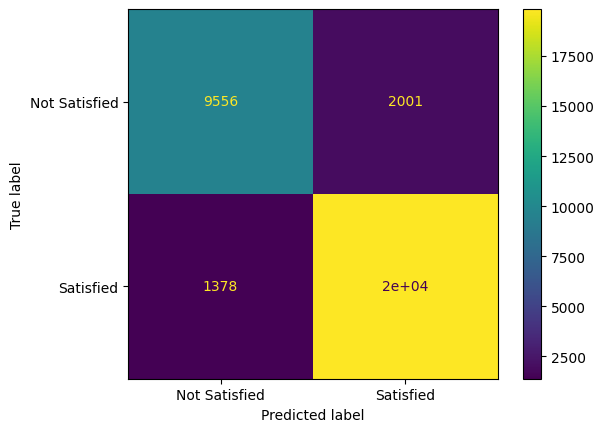

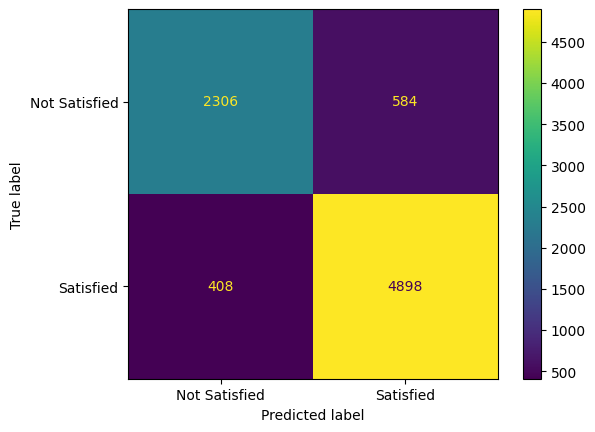

In [98]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

print('Evaluation on Training \n', classification_report(y_train, nb.predict(x_train)))
print('Evaluation on Testing \n', classification_report(y_test, nb.predict(x_test)))

ConfusionMatrixDisplay.from_estimator(nb, x_train, y_train)
ConfusionMatrixDisplay.from_estimator(nb, x_test, y_test)

##### Now we have a reliable model with better results for classifying customers based on reviews, Next we should investigate further reasons for non-satisfaction.

#### Check Reasons for Non-Satisfaction

In [99]:
# Create a separate DataFrame to check reasons of non satisfaction 
non_satisfied = reviews_df[reviews_df.score == 'Not Satisfied']

# Reset index
non_satisfied.reset_index(inplace= True, drop= True)

#### Text Cleaning & Processing

In [100]:
stemmer = PorterStemmer()
corpus = []

for i in range(non_satisfied.shape[0]):
    comment = re.sub('[^a-zA-Z]', ' ', non_satisfied.comment[i])
    comment = comment.lower()
    comment = comment.strip()
    comment = comment.split()
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    comment = ' '.join(comment)
    
    corpus.append(comment)
    
corpus

['gostaria saber sempr recebi compra agora decpcion',
 'p ssimo',
 'n gostei comprei gato lebr',
 'sempr compro internet entrega ocorr ant prazo combinado acredito prazo m ximo stark prazo m ximo j esgot ainda n recebi produto',
 'nada chegar pedido',
 'recebi soment control midea split estilo faltou control remoto ar condicionado consul',
 'produto n chegou prazo estipulado causou transtorno pq programei viagem f ria filho baseado prazo moro bahia cuiab sozinho agora casa est vazia',
 'comprei dua unidad s recebi agora fa',
 'produto bom m veio mim n condiz foto an ncio',
 'produto inferior mal acabado',
 'entrega prazo',
 'pedi reembolso resposta at momento',
 'produto chegou pc n conseguiu reconhec porta usb',
 'pedido bald pe bloco montar un r cada n entregu vendido entregu targaryen tapet eva n letra pe crian un r entreg',
 'comprei tre pacot cinco folha cada papel transfer tecido escuro so recebi doi',
 'demor pra entrega',
 'entrega dividida dua n comunicado loja cheguei pensar 

#### Translate sample of non-satisfied comments for comprehension

In [101]:
# First install deep_translator library
%pip install deep_translator


  Using cached deep_translator-1.11.4-py3-none-any.whl.metadata (30 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.5-py3-none-any.whl.metadata (4.7 kB)
Using cached deep_translator-1.11.4-py3-none-any.whl (42 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached soupsieve-2.5-py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [104]:
from deep_translator import GoogleTranslator
import random

In [107]:
non_satisfied_trans = []
random.seed(42)

for sentence in random.sample(corpus, 1000):
    non_satisfied_trans.append(GoogleTranslator(source='portuguese', target='english', force=True).translate(sentence))
    
non_satisfied_trans


["product still hasn't arrived",
 'through the gel cell came another device',
 "They didn't deliver the deadline on the next day, scissors will be bought here because the company hasn't committed, send an email to reassure",
 'I will not confirm delivery where the product purchased only arrived, only the purchase code tracking says delivery of the goods is complicated',
 "apparently good product, still haven't had time to test it",
 'thanks',
 "No information, no order, I will receive it, the problem happened, I can't contact the necessary information.",
 'delivery delay product arrived defective',
 'only product delivered rope not received palm',
 'I bought two perfumes and they only came with a box to help, counterfeit perfume marked with a prohibited sale box only for testing',
 "The brush kit didn't arrive, it may come separately, anyway, I didn't like the shipping method because it says product delivered",
 "delivered quickly I didn't like the product, bad fabric",
 "Hello, I boug

In [108]:
# Apply stemming to the translated text
non_satisfied_final = []

for sent in non_satisfied_trans:

    for word in sent.split():

        if word not in set(stopwords.words('english')):

            non_satisfied_final.append(stemmer.stem(word))

non_satisfied_final

['product',
 'still',
 'arriv',
 'gel',
 'cell',
 'came',
 'anoth',
 'devic',
 'they',
 'deliv',
 'deadlin',
 'next',
 'day,',
 'scissor',
 'bought',
 'compani',
 'committed,',
 'send',
 'email',
 'reassur',
 'i',
 'confirm',
 'deliveri',
 'product',
 'purchas',
 'arrived,',
 'purchas',
 'code',
 'track',
 'say',
 'deliveri',
 'good',
 'complic',
 'appar',
 'good',
 'product,',
 'still',
 'time',
 'test',
 'thank',
 'no',
 'information,',
 'order,',
 'i',
 'receiv',
 'it,',
 'problem',
 'happened,',
 'i',
 "can't",
 'contact',
 'necessari',
 'information.',
 'deliveri',
 'delay',
 'product',
 'arriv',
 'defect',
 'product',
 'deliv',
 'rope',
 'receiv',
 'palm',
 'i',
 'bought',
 'two',
 'perfum',
 'came',
 'box',
 'help,',
 'counterfeit',
 'perfum',
 'mark',
 'prohibit',
 'sale',
 'box',
 'test',
 'the',
 'brush',
 'kit',
 'arrive,',
 'may',
 'come',
 'separately,',
 'anyway,',
 'i',
 'like',
 'ship',
 'method',
 'say',
 'product',
 'deliv',
 'deliv',
 'quickli',
 'i',
 'like',
 'prod

(-0.5, 999.5, 799.5, -0.5)

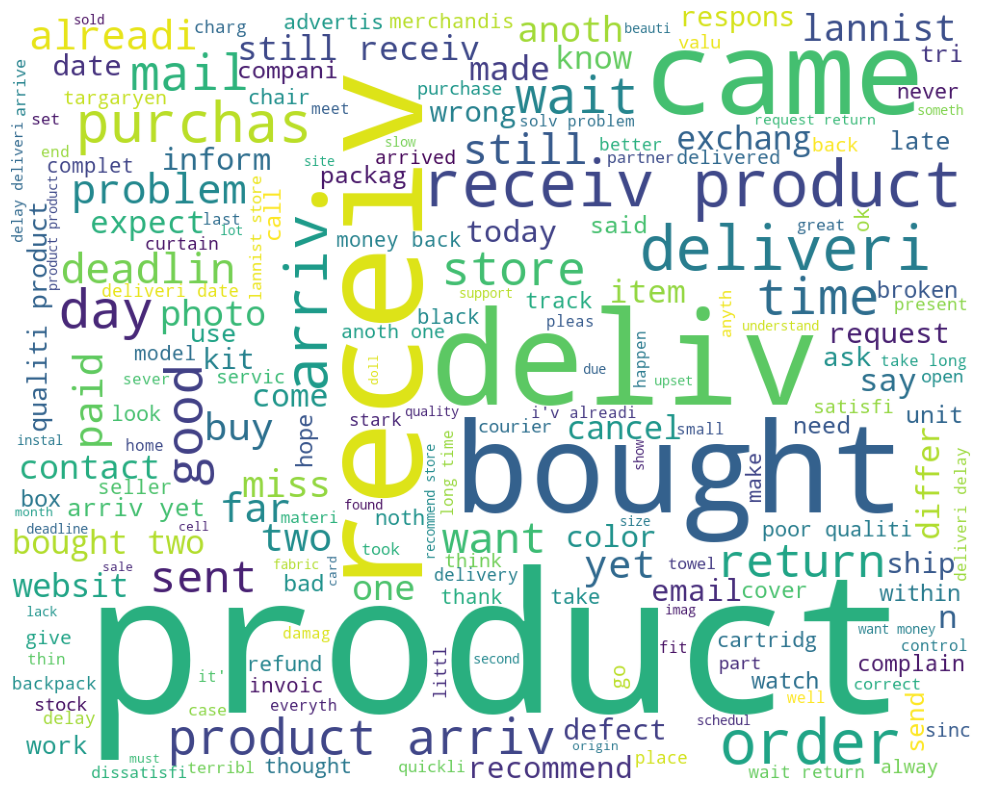

In [109]:
# Visualize most common words for non-satsifaction
from wordcloud import WordCloud

non_satisfied_final = ' '.join(non_satisfied_final)
non_satisfied_freq = WordCloud(width=1000, height=800, background_color='white').generate(non_satisfied_final)

plt.figure(figsize=(15, 10))
plt.imshow(non_satisfied_freq)
plt.axis("off")

In [110]:
# Sort the word frequencies in descending order
non_satisfied_freq = non_satisfied_freq.process_text(non_satisfied_final)
sorted_word_frequencies = sorted(non_satisfied_freq.items(), key= lambda x : x[1], reverse=True)

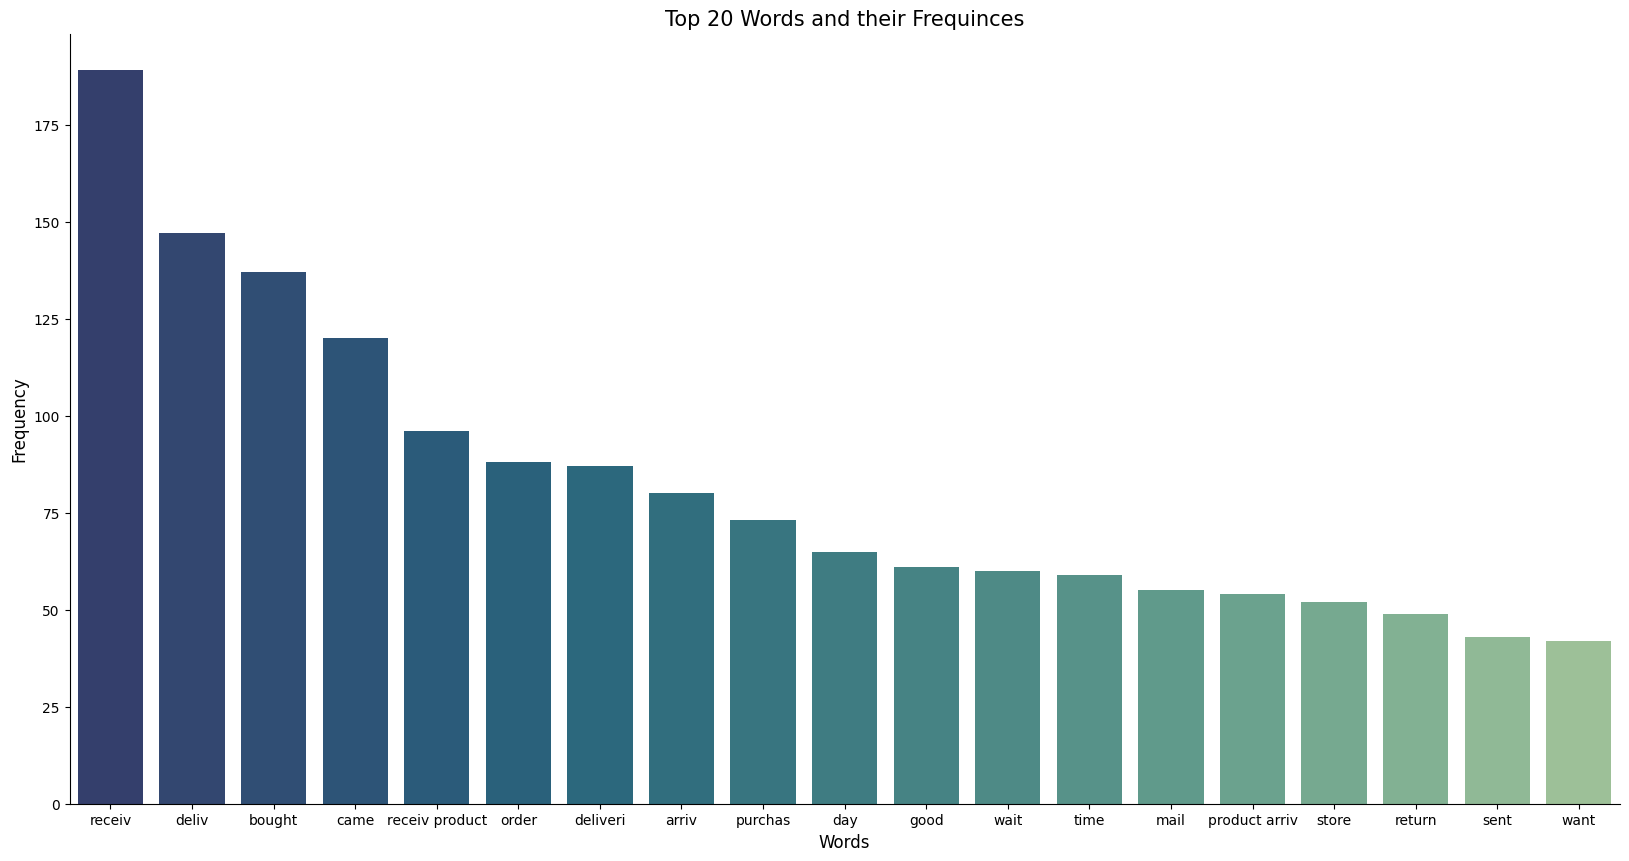

In [111]:
# Plot Words vs Frequency
plt.figure(figsize= [20, 10])
sns.barplot(x = pd.DataFrame(sorted_word_frequencies)[1:20][0], y= pd.DataFrame(sorted_word_frequencies)[1:20][1], palette= 'crest_r')
plt.title('Top 20 Words and their Frequinces', fontsize= 15)
plt.xlabel('Words', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
sns.despine()

#### From the study of non-satisfied customers reviews, we can see that majority of words mentioned are related to shipping issues.

# 9.0 Customer Segmentation

### 9.1 Customer Segmentation by RFM Analysis

In [112]:
df_2.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

     customer_city customer_state                          order_id  \
0           franca             SP  00e7ee1b050b8499577073aeb2a297a1   
1         santarem             PA  c1d2b34febe9cd269e378117d6681172   
2         santarem             PA  c1d2b34febe9cd269e378117d6681172   
3  nova santa rita             RS  b1a5d5365d330d10485e0203d54ab9e8   
4             mage             RJ  2e604b3614664aa66867856dba7e61b7   

  order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0      2017-05-16 15:05:35 2017-05-16 15:22:12          2017-05-23 10:47:57   
1      2017-11-09 00:50:13 2017-11-10 00:47:48          2017-11-22 01:43:37   
2      2017-11-09 00:50:13 2017-11-10 00:47:48          2017-11-22 01:43:37   
3      2017-05-07 20:11:26 2017-05-08 22:22:56          2017-05-19 20:16:31   
4      2018-02-03 19:45:40 2018-02-04 22:29:19          2018-02-19 18:21:47   

  order_delivered_customer_date order_estimated_delivery_date  ...  \
0           2017-05-25 10:35:35                    2017-06-05  ...   
1           2017-11-28 00:09:50                    2017-12-19  ...   
2           2017-11-28 00:09:50                    2017-12-19  ...   
3           2017-05-26 09:54:04                    2017-06-12  ...   
4           2018-02-28 21:09:00                    2018-03-22  ...   

  product_category  product_vol_cm3 estimated_days arrival_days shipping_days  \
0        Furniture         107136.0             20            9             2   
1        Furniture         107136.0             40           19             6   
2        Furniture         107136.0             40           19             6   
3        Furniture         107136.0             36           19             7   
4        Furniture         107136.0             47           25             9   

  seller_to_carrier_status  arrival_status estimated_delivery_rate  \
0                     Late    OnTime/Early                 Neutral   
1             OnTime/Early    OnTime/Early               Very Slow   
2             OnTime/Early    OnTime/Early               Very Slow   
3             OnTime/Early    OnTime/Early                    Slow   
4                     Late    OnTime/Early               Very Slow   

  arrival_delivery_rate shipping_delivery_rate  
0                  Fast              Very Fast  
1               Neutral              Very Fast  
2               Neutral              Very Fast  
3               Neutral              Very Fast  
4                  Slow                   Fast  

[5 rows x 44 columns]

In [113]:
# Get last transaction date to help calculate Recency
max_trans_date = max(df_2.order_purchase_timestamp).date()
max_trans_date

datetime.date(2018, 8, 29)

#### Create Recency, Frequancy and Monetary Features

In [114]:
from datetime import datetime

rfm_table = df_2.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d') - x.max()).days,
                                                                'product_id': lambda x:len(x),
                                                             'payment_value': lambda x:sum(x)})
rfm_table

order_purchase_timestamp  product_id  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                       110           1   
0000b849f77a49e4a4ce2b2a4ca5be3f                       113           1   
0000f46a3911fa3c0805444483337064                       536           1   
0000f6ccb0745a6a4b88665a16c9f078                       320           1   
0004aac84e0df4da2b147fca70cf8255                       287           1   
...                                                    ...         ...   
fffcf5a5ff07b0908bd4e2dbc735a684                       446           2   
fffea47cd6d3cc0a88bd621562a9d061                       261           1   
ffff371b4d645b6ecea244b27531430a                       567           1   
ffff5962728ec6157033ef9805bacc48                       118           1   
ffffd2657e2aad2907e67c3e9daecbeb                       483           1   

                                  payment_value  
customer_unique_id                               
0000366f3b9a7992bf8c76cfdf3221e2         141.90  
0000b849f77a49e4a4ce2b2a4ca5be3f          27.19  
0000f46a3911fa3c0805444483337064          86.22  
0000f6ccb0745a6a4b88665a16c9f078          43.62  
0004aac84e0df4da2b147fca70cf8255         196.89  
...                                         ...  
fffcf5a5ff07b0908bd4e2dbc735a684        4134.84  
fffea47cd6d3cc0a88bd621562a9d061          84.58  
ffff371b4d645b6ecea244b27531430a         112.46  
ffff5962728ec6157033ef9805bacc48         133.69  
ffffd2657e2aad2907e67c3e9daecbeb          71.56  

[90967 rows x 3 columns]

In [115]:
# Rename columns
rfm_table.rename(columns={'order_purchase_timestamp':'Recency','product_id':'Frequancy','payment_value':'Monetary'}, inplace=True)
rfm_table

Recency  Frequancy  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19
0000f46a3911fa3c0805444483337064      536          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62
0004aac84e0df4da2b147fca70cf8255      287          1    196.89
...                                   ...        ...       ...
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58
ffff371b4d645b6ecea244b27531430a      567          1    112.46
ffff5962728ec6157033ef9805bacc48      118          1    133.69
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56

[90967 rows x 3 columns]

#### Create Recency, Frequancy and Monetary scores

In [116]:
rfm_table['r_score'] = pd.qcut(rfm_table['Recency'], 4, ['4','3','2','1'])
rfm_table['f_score'] = pd.qcut(rfm_table['Frequancy'].rank(method= 'first'), 4, ['1','2','3','4'])
rfm_table['m_score'] = pd.qcut(rfm_table['Monetary'], 4, ['1','2','3','4'])
rfm_table

Recency  Frequancy  Monetary r_score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19       3   
0000f46a3911fa3c0805444483337064      536          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58       2   
ffff371b4d645b6ecea244b27531430a      567          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      118          1    133.69       3   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56       1   

                                 f_score m_score  
customer_unique_id                                
0000366f3b9a7992bf8c76cfdf3221e2       1       3  
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1  
0000f46a3911fa3c0805444483337064       1       2  
0000f6ccb0745a6a4b88665a16c9f078       1       1  
0004aac84e0df4da2b147fca70cf8255       1       3  
...                                  ...     ...  
fffcf5a5ff07b0908bd4e2dbc735a684       4       4  
fffea47cd6d3cc0a88bd621562a9d061       4       2  
ffff371b4d645b6ecea244b27531430a       4       2  
ffff5962728ec6157033ef9805bacc48       4       3  
ffffd2657e2aad2907e67c3e9daecbeb       4       2  

[90967 rows x 6 columns]

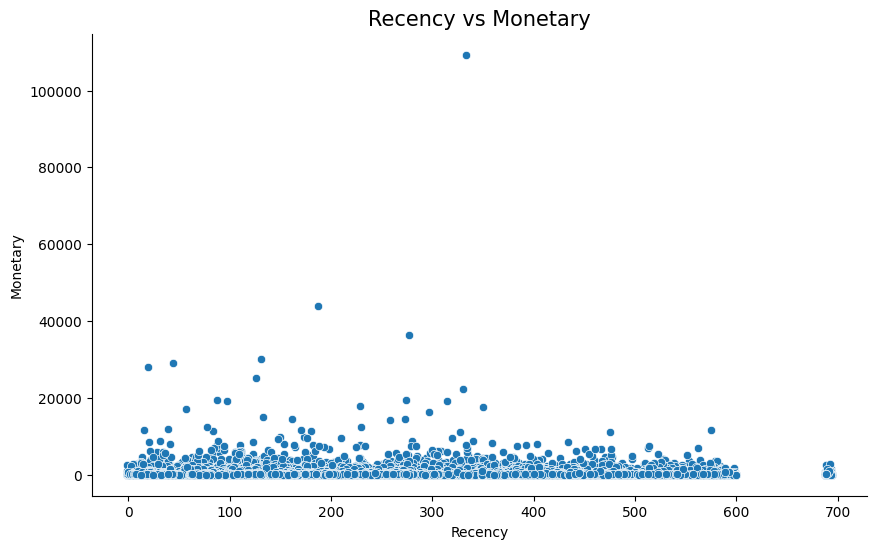

In [117]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x= 'Recency',y= 'Monetary', data=rfm_table)
plt.title('Recency vs Monetary', fontsize= 15)
sns.despine()

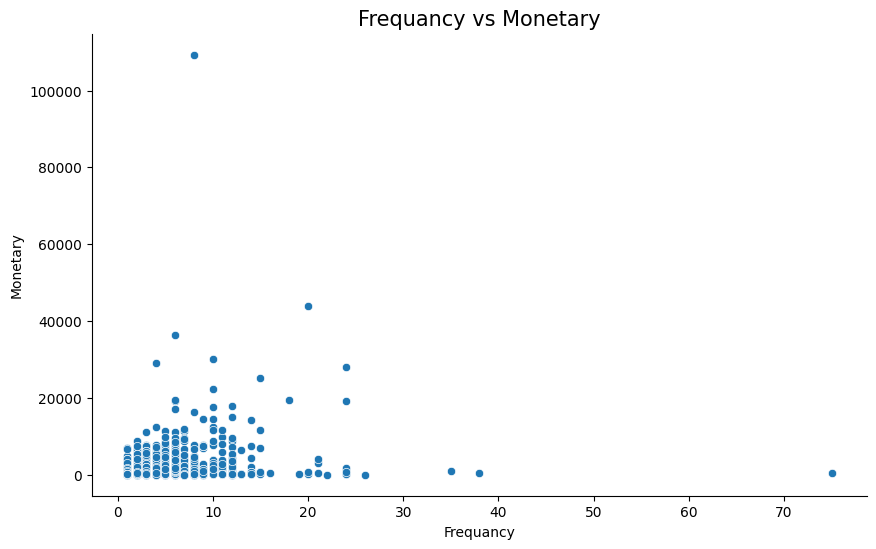

In [118]:
plt.figure(figsize= [10, 6])
sns.scatterplot(x='Frequancy', y='Monetary', data=rfm_table)
plt.title('Frequancy vs Monetary', fontsize= 15)
sns.despine()

#### Calculate RFM Score

In [119]:
rfm_table['rfm_score'] = 100 * rfm_table['r_score'].astype(int) + 10 * rfm_table['f_score'].astype(int)+ rfm_table['m_score'].astype(int)
rfm_table

Recency  Frequancy  Monetary r_score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19       3   
0000f46a3911fa3c0805444483337064      536          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58       2   
ffff371b4d645b6ecea244b27531430a      567          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      118          1    133.69       3   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56       1   

                                 f_score m_score  rfm_score  
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2       1       3        413  
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1        311  
0000f46a3911fa3c0805444483337064       1       2        112  
0000f6ccb0745a6a4b88665a16c9f078       1       1        211  
0004aac84e0df4da2b147fca70cf8255       1       3        213  
...                                  ...     ...        ...  
fffcf5a5ff07b0908bd4e2dbc735a684       4       4        144  
fffea47cd6d3cc0a88bd621562a9d061       4       2        242  
ffff371b4d645b6ecea244b27531430a       4       2        142  
ffff5962728ec6157033ef9805bacc48       4       3        343  
ffffd2657e2aad2907e67c3e9daecbeb       4       2        142  

[90967 rows x 7 columns]

#### Cluster customers based on RFM Score

In [120]:
def customer_segmenation(rfm_score):
  
  if rfm_score == 444:
    return 'VIP'
  
  elif  rfm_score >= 433 and rfm_score < 444:
    return 'Very Loyal'
  
  elif   rfm_score >=421 and rfm_score< 433:
    return 'Potential Loyalist'
  
  elif rfm_score>=344 and rfm_score < 421:
    return 'New customers'
  
  elif rfm_score>=323 and rfm_score<344:
    return 'Potential customer'
  
  elif rfm_score>=224 and rfm_score<311:
    return 'High risk to churn' 
  
  else:
    return 'Lost customers'       
  
rfm_table['customer_segmentation'] = rfm_table['rfm_score'].apply(customer_segmenation)

rfm_table

Recency  Frequancy  Monetary r_score  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2      110          1    141.90       4   
0000b849f77a49e4a4ce2b2a4ca5be3f      113          1     27.19       3   
0000f46a3911fa3c0805444483337064      536          1     86.22       1   
0000f6ccb0745a6a4b88665a16c9f078      320          1     43.62       2   
0004aac84e0df4da2b147fca70cf8255      287          1    196.89       2   
...                                   ...        ...       ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684      446          2   4134.84       1   
fffea47cd6d3cc0a88bd621562a9d061      261          1     84.58       2   
ffff371b4d645b6ecea244b27531430a      567          1    112.46       1   
ffff5962728ec6157033ef9805bacc48      118          1    133.69       3   
ffffd2657e2aad2907e67c3e9daecbeb      483          1     71.56       1   

                                 f_score m_score  rfm_score  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2       1       3        413   
0000b849f77a49e4a4ce2b2a4ca5be3f       1       1        311   
0000f46a3911fa3c0805444483337064       1       2        112   
0000f6ccb0745a6a4b88665a16c9f078       1       1        211   
0004aac84e0df4da2b147fca70cf8255       1       3        213   
...                                  ...     ...        ...   
fffcf5a5ff07b0908bd4e2dbc735a684       4       4        144   
fffea47cd6d3cc0a88bd621562a9d061       4       2        242   
ffff371b4d645b6ecea244b27531430a       4       2        142   
ffff5962728ec6157033ef9805bacc48       4       3        343   
ffffd2657e2aad2907e67c3e9daecbeb       4       2        142   

                                 customer_segmentation  
customer_unique_id                                      
0000366f3b9a7992bf8c76cfdf3221e2         New customers  
0000b849f77a49e4a4ce2b2a4ca5be3f        Lost customers  
0000f46a3911fa3c0805444483337064        Lost customers  
0000f6ccb0745a6a4b88665a16c9f078        Lost customers  
0004aac84e0df4da2b147fca70cf8255        Lost customers  
...                                                ...  
fffcf5a5ff07b0908bd4e2dbc735a684        Lost customers  
fffea47cd6d3cc0a88bd621562a9d061    High risk to churn  
ffff371b4d645b6ecea244b27531430a        Lost customers  
ffff5962728ec6157033ef9805bacc48    Potential customer  
ffffd2657e2aad2907e67c3e9daecbeb        Lost customers  

[90967 rows x 8 columns]

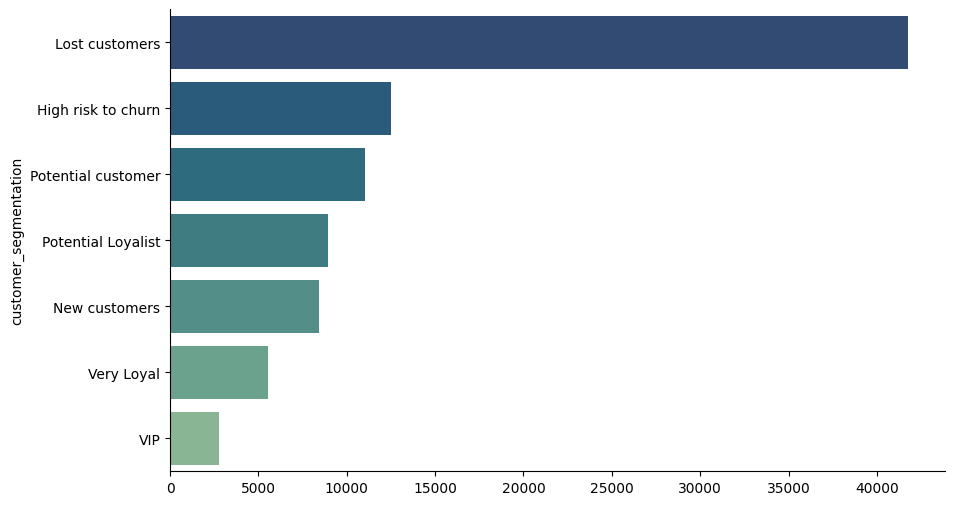

In [121]:
# Plot frquency of each segment
plt.figure(figsize=[10,6])
sns.barplot(x = rfm_table.customer_segmentation.value_counts().values, y= rfm_table.customer_segmentation.value_counts().index, palette= 'crest_r')
sns.despine()

### Check Outliers

In [122]:
rfm_table.describe()

Recency     Frequancy       Monetary     rfm_score
count  90967.000000  90967.000000   90967.000000  90967.000000
mean     235.148120      1.237042     211.872327    277.935768
std      152.224966      0.843657     632.223135    112.463008
min       -1.000000      1.000000       9.590000    111.000000
25%      112.000000      1.000000      63.680000    211.000000
50%      216.000000      1.000000     112.670000    311.000000
75%      344.000000      1.000000     201.990000    411.000000
max      694.000000     75.000000  109312.640000    444.000000

#### Recency

<Axes: xlabel='Recency'>

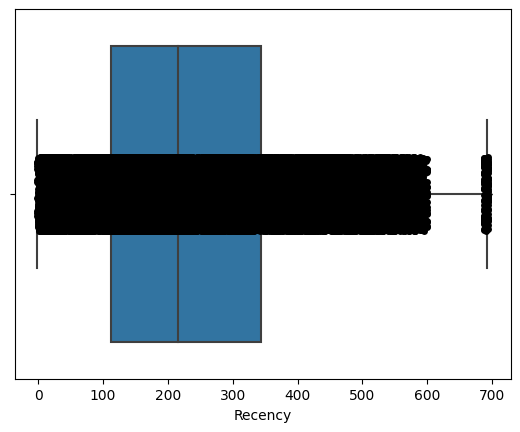

In [123]:
sns.boxplot(x= rfm_table.Recency)
sns.stripplot(x = rfm_table.Recency, color= 'black')

#### Frequancy

<Axes: xlabel='Frequancy'>

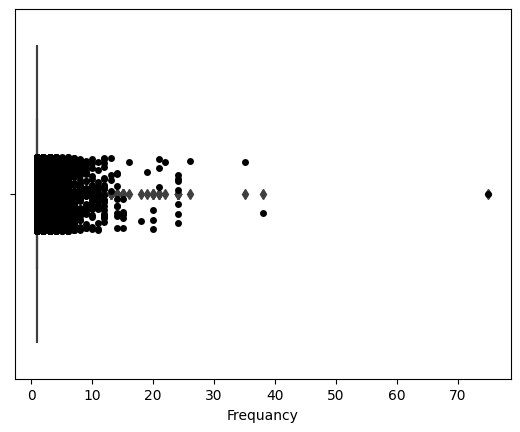

In [124]:
sns.boxplot(x= rfm_table.Frequancy)
sns.stripplot(x = rfm_table.Frequancy, color= 'black')

#### Monetary

<Axes: xlabel='Monetary'>

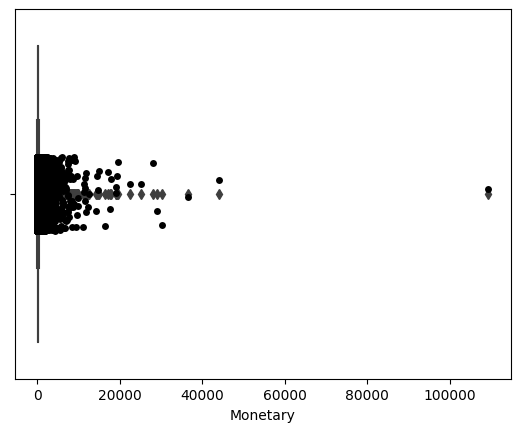

In [125]:
sns.boxplot(x= rfm_table.Monetary)
sns.stripplot(x = rfm_table.Monetary, color= 'black')

#### Remove Extreme 5% of Outliers

In [126]:
print('Recency 5% Outliers Limits:', np.percentile(rfm_table.Recency, 5), np.percentile(rfm_table.Recency, 95))
print('Frequancy 5% Outliers Limits:', np.percentile(rfm_table.Frequancy, 5), np.percentile(rfm_table.Frequancy, 95))
print('Monetary 5% Outliers Limits:', np.percentile(rfm_table.Monetary, 5), np.percentile(rfm_table.Monetary, 95))

Recency 5% Outliers Limits: 22.0 517.0
Frequancy 5% Outliers Limits: 1.0 2.0
Monetary 5% Outliers Limits: 32.69 660.3969999999999


#### Remove Outliers for Recency & Monetary (Extreme 5%)

In [127]:
for i in [0, 2]:

    outlier_indices = []
    col = rfm_table.columns[i]
    percentile_5 = np.percentile(rfm_table[col], 5)
    percentile_95 = np.percentile(rfm_table[col], 95)
    outlier_indices.append(rfm_table[(rfm_table[col] < percentile_5) | (rfm_table[col] > percentile_95)].index)

rfm_table.drop(outlier_indices[0][:], inplace= True)
rfm_table.reset_index(inplace= True, drop= True)

#### Customer Segmentation Grid

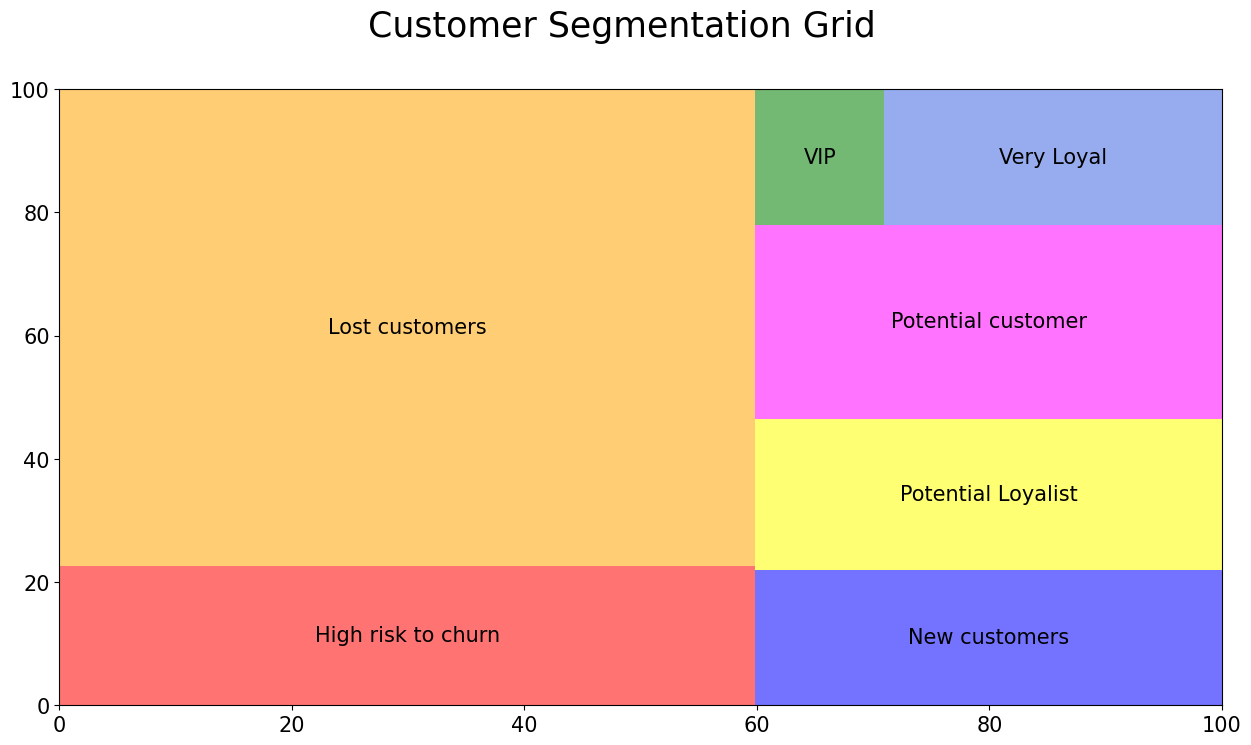

In [128]:
import squarify

plt.figure(figsize=[15,8])
plt.rc('font', size=15)

Sizes = rfm_table.groupby('customer_segmentation')[['Monetary']].count()
squarify.plot(sizes= Sizes.values, label= Sizes.index, color=["red", "orange", "blue", "yellow", "fuchsia", "green", "royalblue"], alpha=.55)
plt.suptitle("Customer Segmentation Grid", fontsize=25);

#### Recency & Monetary Plot

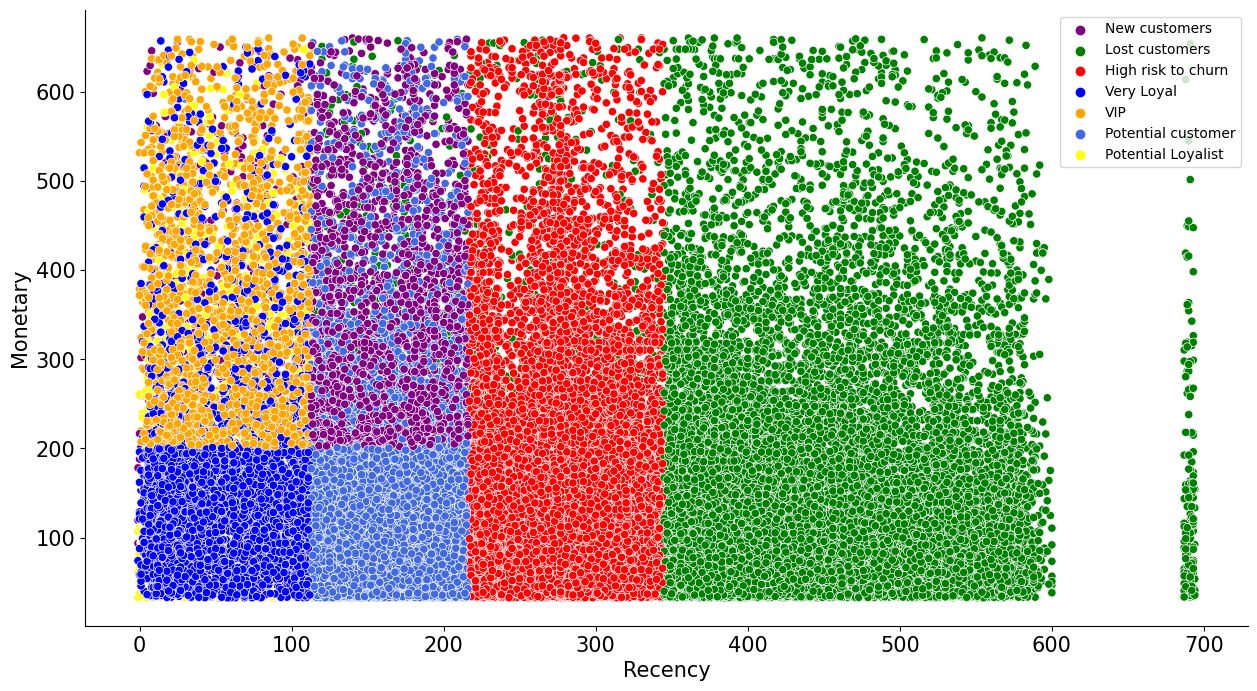

In [129]:
plt.figure(figsize= [15, 8])
colors = ['purple', 'green', 'red', 'blue', 'orange', 'royalblue', 'yellow']
sns.scatterplot(x= rfm_table.Recency, y= rfm_table.Monetary, hue= rfm_table.customer_segmentation, palette= colors)
plt.legend(prop={'size':10})
sns.despine()

### Check Skeweness

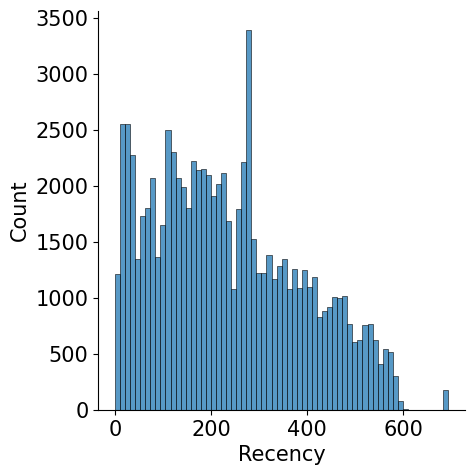

In [130]:
# Recency
sns.displot(x= rfm_table.Recency)

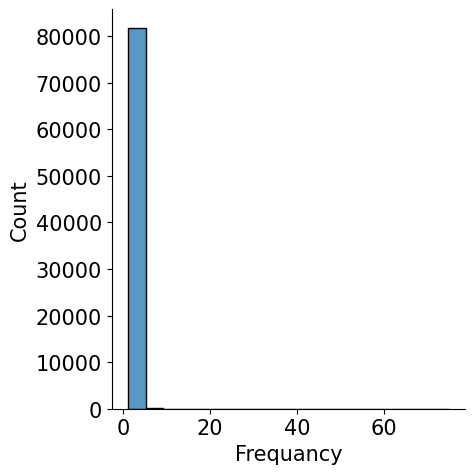

In [131]:
# Frequancy
sns.displot(x= rfm_table.Frequancy)

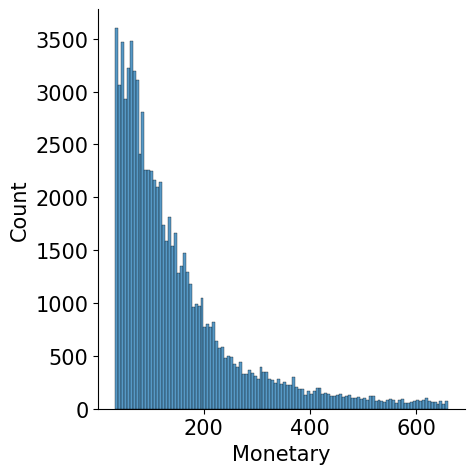

In [132]:
# Monetary
sns.displot(x= rfm_table.Monetary)

#### Apply Log function to handle skeweness for Frequancy & Monetary

In [133]:
for i in ['Frequancy', 'Monetary']:
    rfm_table[i] = np.log10(rfm_table[i])

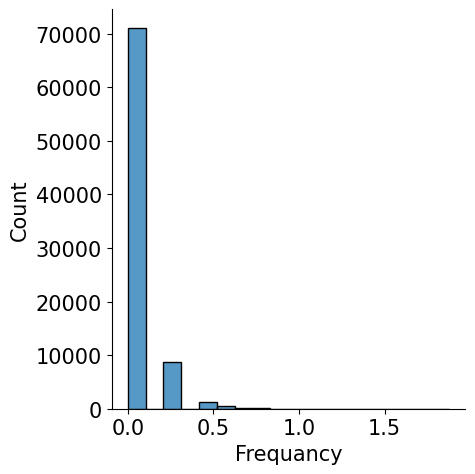

In [134]:
# Frequancy
sns.displot(x= rfm_table.Frequancy)

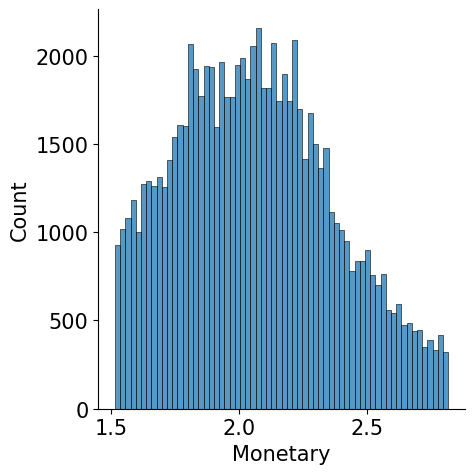

In [135]:
# Monetary
sns.displot(x= rfm_table.Monetary)

### 9.2 Clustering with K-means

In [136]:
df_cluster = df_2[['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']]
df_cluster

freight_value   price  payment_value  payment_installments  \
0               21.88  124.99         146.87                     2   
1               24.90  112.99         275.79                     1   
2               24.90  112.99         275.79                     1   
3               15.62  124.99         140.61                     7   
4               30.59  106.99         137.58                    10   
...               ...     ...            ...                   ...   
112525          39.19  193.00         232.19                    10   
112526          37.70  389.00         426.70                     8   
112527          21.46  139.00         160.46                     3   
112528          26.18  129.00          55.18                     2   
112529          26.18  129.00         100.00                     1   

        payment_sequential  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
112525                   1  
112526                   1  
112527                   1  
112528                   1  
112529                   2  

[112530 rows x 5 columns]

### Take sample from data (10k)

In [137]:
df_sample = df_cluster.sample(frac= 1, random_state= 42)[:10000]

#### Save sample as CSV for deployment

In [138]:
df_sample.to_csv('Clustering Sample.csv')

In [139]:
df_sample.describe()

freight_value         price  payment_value  payment_installments  \
count   10000.000000  10000.000000   10000.000000          10000.000000   
mean       19.911140    119.109071     169.673963              2.934500   
std        16.075638    179.788168     239.542446              2.774523   
min         0.000000      0.850000       0.030000              1.000000   
25%        13.070000     39.990000      61.847500              1.000000   
50%        16.320000     75.000000     108.000000              2.000000   
75%        21.190000    130.000000     189.010000              4.000000   
max       338.300000   3999.900000    7274.880000             24.000000   

       payment_sequential  
count        10000.000000  
mean             1.090200  
std              0.699938  
min              1.000000  
25%              1.000000  
50%              1.000000  
75%              1.000000  
max             24.000000

#### Drop freight values with zeros

In [140]:
df_sample.drop(df_sample[df_sample.freight_value == 0].index, inplace= True)
df_sample.reset_index(inplace= True, drop= True)

#### Take copy for Pipeline

In [141]:
cluster_pipeline = df_sample.copy()

In [142]:
for i in ['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']:
    df_sample[i] = np.log10(df_sample[i])

### Feature Scaling

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean= False)
data_scaled = sc.fit_transform(df_sample)

#### Detecting number of clusters uning Elbow Method

Text(0, 0.5, 'WCSS')

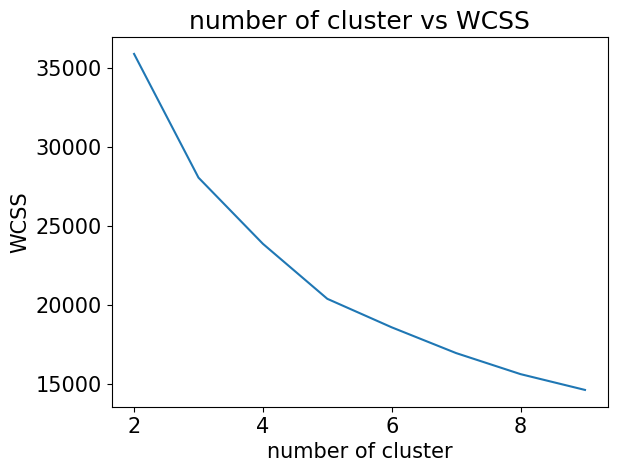

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss = []
scores = []

for i in range(2,10):
  kmean = KMeans(n_clusters=i)
  y_pred_kmean = kmean.fit_predict(data_scaled)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(data_scaled,y_pred_kmean))

plt.plot(range(2,10),wcss)
plt.title('number of cluster vs WCSS')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')

#### Detecting number of clusters using Silhouete Score

Text(0, 0.5, 'silhouette_score')

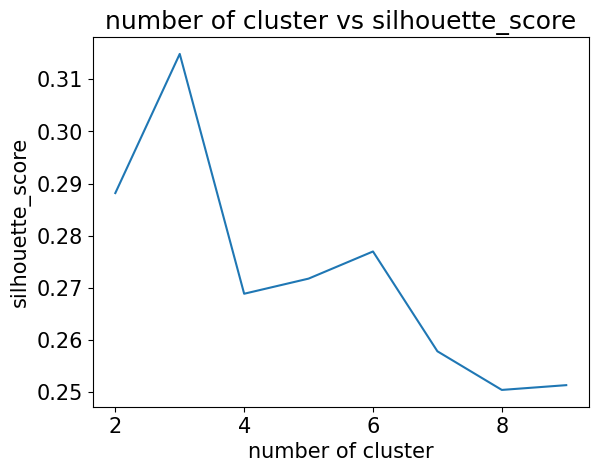

In [145]:
plt.plot(range(2,10),scores)
plt.title('number of cluster vs silhouette_score')
plt.xlabel('number of cluster')
plt.ylabel('silhouette_score')

#### Select number of clusters k= 3

In [146]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters= 3)
y_pred_kmean = kmean.fit_predict(data_scaled)

In [147]:
# Count of each cluster
len(kmean.labels_[kmean.labels_ == 0]), len(kmean.labels_[kmean.labels_ == 1]), len(kmean.labels_[kmean.labels_ == 2])

(4166, 5378, 422)

In [148]:
# Take another sample of original cluster dataframe to assign kmeans labels
original_cluster_sample = df_cluster.sample(frac= 1, random_state= 42)[:9966]

# Assign cluster label to original cluster sample
original_cluster_sample['cluster_label'] = y_pred_kmean
original_cluster_sample.head()

freight_value  price  payment_value  payment_installments  \
20549          18.23   45.0          63.23                     1   
96866           7.87   32.5          40.37                     1   
51608          12.87  195.9         417.54                     1   
20676          22.41   76.0         479.22                     2   
98133          15.10   25.9          41.00                     1   

       payment_sequential  cluster_label  
20549                   1              1  
96866                   1              1  
51608                   1              0  
20676                   1              0  
98133                   1              1

In [149]:
original_cluster_sample.groupby('cluster_label').describe().T

cluster_label                         0            1            2
freight_value        count  4166.000000  5378.000000   422.000000
                     mean     20.050917    19.734650    20.640664
                     std      16.394764    15.378403    21.034065
                     min       0.000000     0.000000     0.000000
                     25%      13.072500    12.972500    13.582500
                     50%      16.270000    16.320000    16.780000
                     75%      21.340000    21.150000    21.125000
                     max     338.300000   299.160000   255.920000
price                count  4166.000000  5378.000000   422.000000
                     mean    120.620588   118.040684   110.570071
                     std     170.194166   187.208810   156.359730
                     min       0.850000     3.900000     5.500000
                     25%      41.922500    39.900000    35.925000
                     50%      75.900000    74.900000    69.900000
                     75%     134.967500   129.990000   124.422500
                     max    2999.890000  3999.900000  1609.900000
payment_value        count  4166.000000  5378.000000   422.000000
                     mean    171.291231   167.157994   162.816493
                     std     224.166085   232.313308   223.912514
                     min       0.080000     0.030000     0.810000
                     25%      62.857500    60.637500    61.490000
                     50%     110.090000   106.885000   100.085000
                     75%     192.985000   184.902500   177.752500
                     max    3024.080000  4016.910000  1916.960000
payment_installments count  4166.000000  5378.000000   422.000000
                     mean      2.967115     2.889922     3.097156
                     std       2.754217     2.781178     2.805245
                     min       1.000000     1.000000     1.000000
                     25%       1.000000     1.000000     1.000000
                     50%       2.000000     1.000000     2.000000
                     75%       4.000000     4.000000     4.000000
                     max      24.000000    24.000000    10.000000
payment_sequential   count  4166.000000  5378.000000   422.000000
                     mean      1.078493     1.103384     1.045024
                     std       0.601585     0.790792     0.249201
                     min       1.000000     1.000000     1.000000
                     25%       1.000000     1.000000     1.000000
                     50%       1.000000     1.000000     1.000000
                     75%       1.000000     1.000000     1.000000
                     max      17.000000    24.000000     4.000000

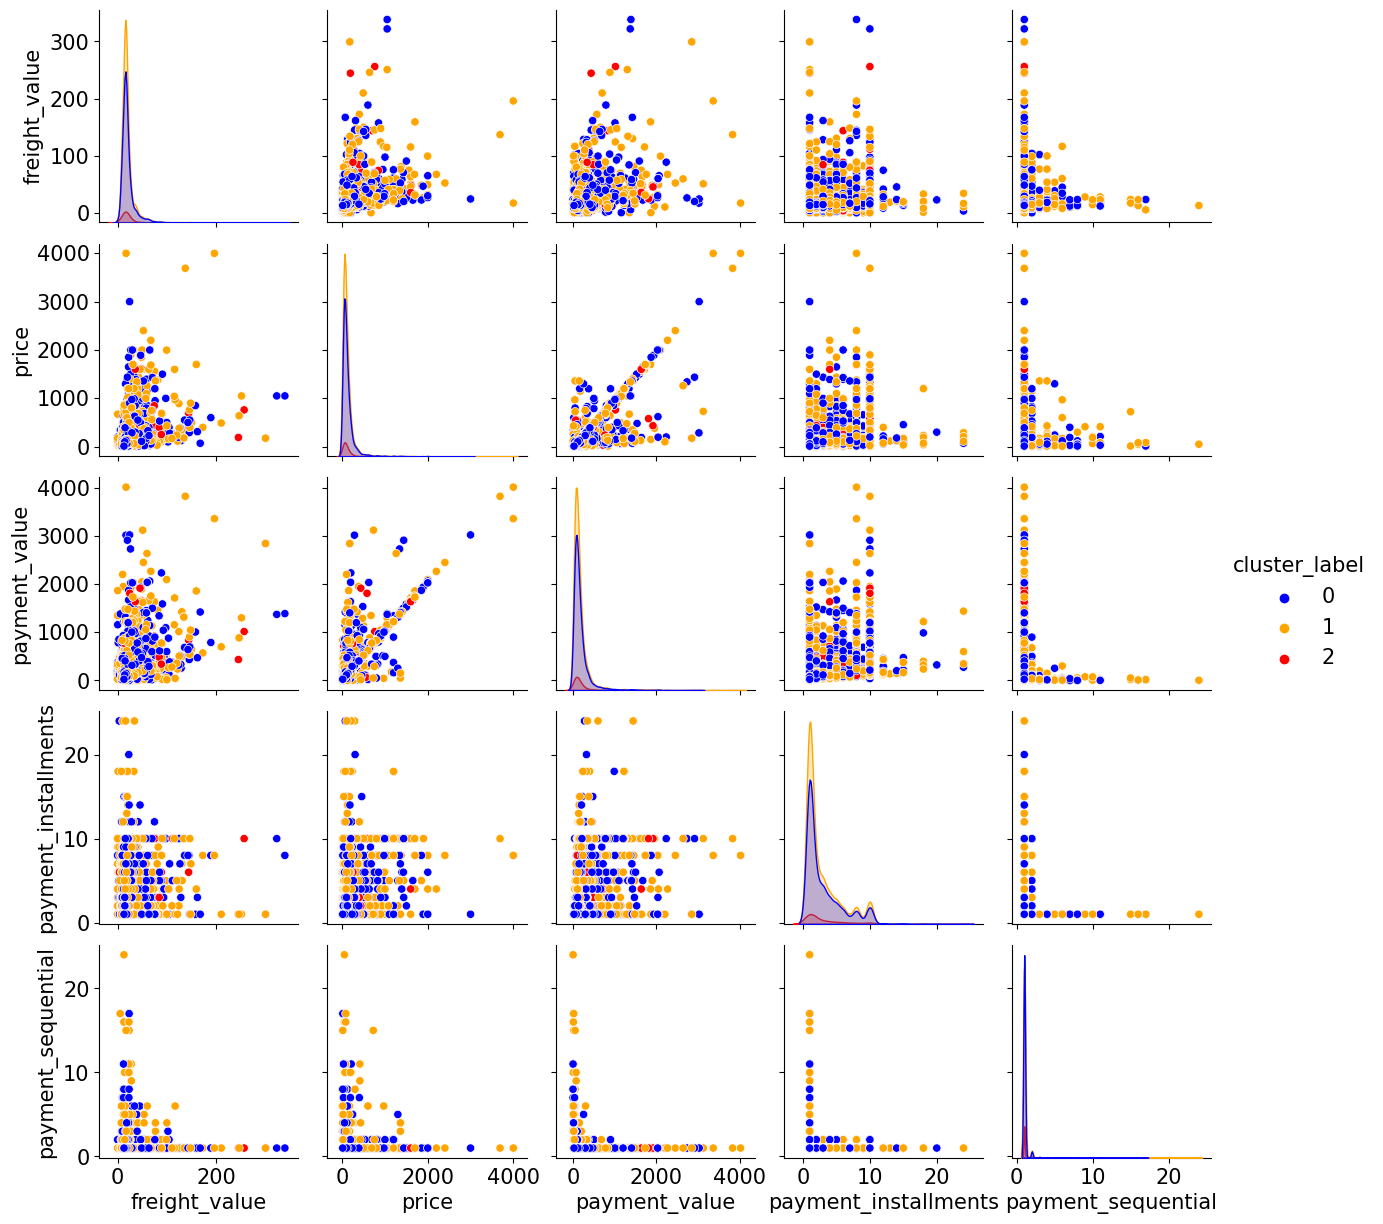

In [150]:
sns.pairplot(data= original_cluster_sample, hue= 'cluster_label', palette= ['blue', 'orange', 'red'])

#### As we can see from statistics table and pairplot that clusters have high percentage of overlaping, sow RFM would be better in this case to cluster customers.

#### Show Kmeans Clusters

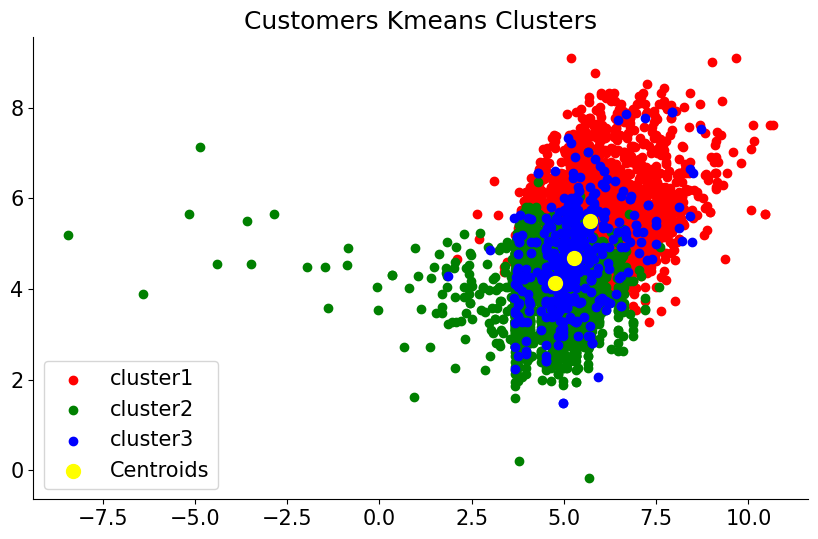

In [151]:
plt.figure(figsize=[10, 6])
plt.scatter(data_scaled[y_pred_kmean==0,0], data_scaled[y_pred_kmean==0,1], c = 'red',label = 'cluster1')
plt.scatter(data_scaled[y_pred_kmean==1,0], data_scaled[y_pred_kmean==1,1], c = 'green',label = 'cluster2')
plt.scatter(data_scaled[y_pred_kmean==2,0], data_scaled[y_pred_kmean==2,1], c = 'blue',label = 'cluster3')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='yellow', s= 100,label= 'Centroids')
plt.title('Customers Kmeans Clusters')
plt.legend()
sns.despine()

#### Show Clusters using PCA

In [152]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
x_pca = pca.fit_transform(data_scaled)
pca.explained_variance_ratio_

array([0.45449169, 0.21940693])

Text(0, 0.5, 'WCSS')

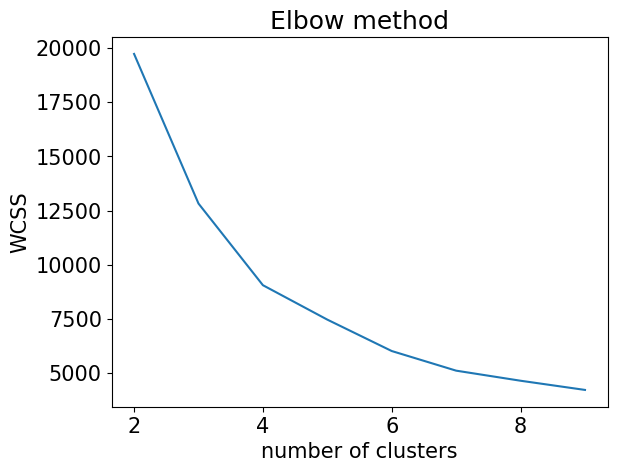

In [153]:
wcss = []
scores = []
for i in range(2,10):
  kmean = KMeans(n_clusters=i)
  y_pred = kmean.fit_predict(x_pca)
  wcss.append(kmean.inertia_)
  scores.append(silhouette_score(x_pca,y_pred))
plt.plot(range(2,10),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')  

Text(0, 0.5, 'silhouette_score')

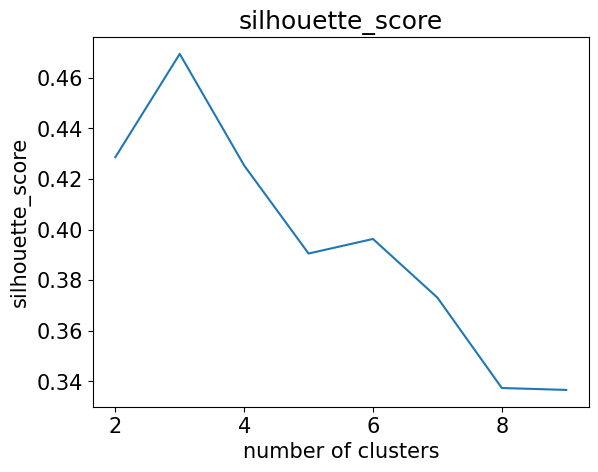

In [154]:
plt.plot(range(2,10),scores)
plt.title('silhouette_score')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')

In [155]:
kmean = KMeans(n_clusters=3)
y_pred_pca = kmean.fit_predict(x_pca)

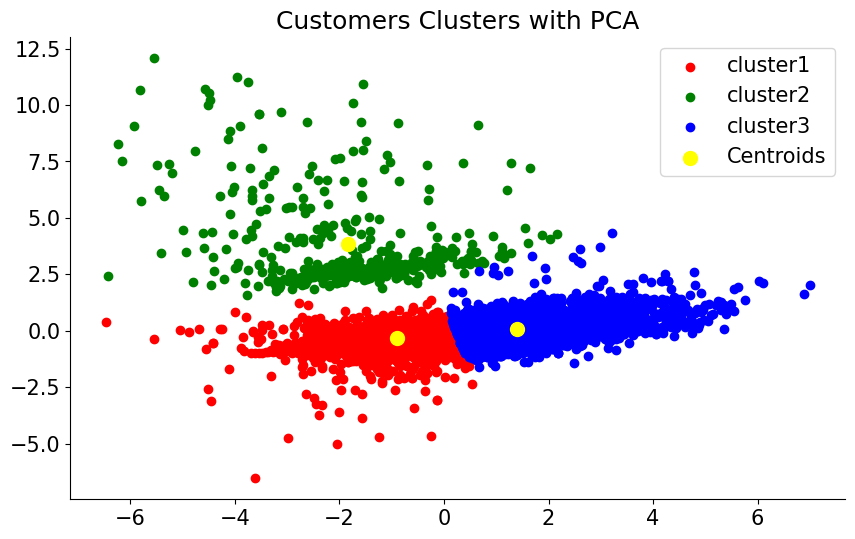

In [156]:
plt.figure(figsize=[10, 6])
plt.scatter(x_pca[y_pred_pca==0,0],x_pca[y_pred_pca==0,1],c = 'red',label = 'cluster1')
plt.scatter(x_pca[y_pred_pca==1,0],x_pca[y_pred_pca==1,1],c = 'green',label = 'cluster2')
plt.scatter(x_pca[y_pred_pca==2,0],x_pca[y_pred_pca==2,1],c = 'blue',label = 'cluster3')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],c='yellow',s=100,label='Centroids')
plt.title('Customers Clusters with PCA')
plt.legend()
sns.despine()

## 9.3 Pipeline

#### Prepare Features

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

numerical_pipeline_cluster = Pipeline(steps=[('Feature Scaling', StandardScaler(with_mean=False))])

In [158]:
from sklearn.compose import ColumnTransformer

preprocessing_cluster = ColumnTransformer(transformers= [('Numerical Columns', numerical_pipeline_cluster, cluster_pipeline.columns)], 
                                          remainder= 'passthrough')
preprocessing_cluster

ColumnTransformer(remainder='passthrough',
                  transformers=[('Numerical Columns',
                                 Pipeline(steps=[('Feature Scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])

In [159]:
final_pipeline_cluster = Pipeline(steps=[('Preprocessing', preprocessing_cluster), ('Log Transformer', FunctionTransformer(np.log10)),
                                ('Model', KMeans(n_clusters= 3))])
final_pipeline_cluster

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])),
                ('Log Transformer', FunctionTransformer(func=<ufunc 'log10'>)),
                ('Model', KMeans(n_clusters=3))])

In [160]:
# Fit pipeline to Dataframe
final_pipeline_cluster.fit(cluster_pipeline)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])),
                ('Log Transformer', FunctionTransformer(func=<ufunc 'log10'>)),
                ('Model', KMeans(n_clusters=3))])

In [161]:
# Save model as bkl file
import joblib
joblib.dump(final_pipeline_cluster, 'Brazilian Ecommerce Clustering.bkl')

['Brazilian Ecommerce Clustering.bkl']

In [162]:
final_pipeline_cluster

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical Columns',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['freight_value', 'price', 'payment_value', 'payment_installments',
       'payment_sequential'],
      dtype='object'))])),
                ('Log Transformer', FunctionTransformer(func=<ufunc 'log10'>)),
                ('Model', KMeans(n_clusters=3))])

# 10.0 Model Deployment

In [163]:
model_classification = joblib.load('Brazilian Ecommerce Classification.bkl')
model_clustering = joblib.load('Brazilian Ecommerce Clustering.bkl')

#### Test Classification Model

In [164]:
model_classification.predict(pd.DataFrame({'freight_value' :[30], 'product_description_lenght' :[1000], 'product_photos_qty' :[4], 'payment_type' :['credit_card'], 'payment_installments' :[6], 'payment_value' :[1000], 'estimated_days' :[7], 'arrival_days' :[6], 'arrival_status' :['OnTime/Early'], 'seller_to_carrier_status' :['OnTime/Early'], 'estimated_delivery_rate' :['Very Fast'], 'arrival_delivery_rate' :['Very Fast'], 'shipping_delivery_rate' :['Very Fast']}))

array([1])

#### Test Clustering Model

In [165]:
model_clustering.predict(pd.DataFrame({'freight_value' :[10], 'price' :[90], 'payment_value' :[100], 'payment_installments' :[10], 'payment_sequential' :[3]}))

array([0], dtype=int32)

In [166]:
# Install neccessary libraries for deployment

! pip install ydata_profiling
! pip install streamlit_pandas_profiling

### Deployment with Streamlit

In [167]:
%%writefile Brazilian_Ecommerce_Project.py

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import streamlit as st
from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from ydata_profiling import ProfileReport
from streamlit_pandas_profiling import st_profile_report

# Load Classification and Clustering Pipeline models
model_classification = joblib.load('Brazilian Ecommerce Classification.bkl')
model_clustering = joblib.load('Brazilian Ecommerce Clustering.bkl')

# Create Sidebar to navigate between EDA, Classification and Clustering
sidebar = st.sidebar
mode = sidebar.radio('Mode', ['EDA', 'Classification', 'Clustering'])
st.markdown("<h1 style='text-align: center; color: #ff0000;'></h1>", unsafe_allow_html=True)

if mode == "EDA":

    def main():

        # Header of Customer Satisfaction Prediction
        html_temp="""
                    <div style="background-color:#F5F5F5">
                    <h1 style="color:#31333F;text-align:center;"> Customer Satisfaction Prediction </h1>
                    </div>
                """
        # Create sidebar to upload CSV files
        with st.sidebar.header('Upload your CSV data'):
            uploaded_file = st.sidebar.file_uploader('Upload your input csv file')

        if uploaded_file is not None:
            # Read file and Put headers
            EDA_sample = pd.read_csv(uploaded_file, index_col= 0)
            pr = ProfileReport(EDA_sample, explorative=True)
            st.header('**Input DataFrame**')
            st.write(EDA_sample)
            st.write('---')
            st.header('**Pandas Profiling Report**')
            st_profile_report(pr)
        
        else:
            st.info('Awaiting for CSV file to be uploaded.')

    if __name__ == '__main__':
        main()

if mode == "Classification":

    # Define function to predict classification based on assigned features
    def predict_satisfaction(freight_value, product_description_lenght, product_photos_qty, payment_type, payment_installments, payment_value, 
    estimated_days, arrival_days, arrival_status, seller_to_carrier_status, estimated_delivery_rate, arrival_delivery_rate, shipping_delivery_rate):

        prediction_classification = model_classification.predict(pd.DataFrame({'freight_value' :[freight_value], 'product_description_lenght' :[product_description_lenght], 'product_photos_qty' :[product_photos_qty], 'payment_type' :[payment_type], 'payment_installments' :[payment_installments], 'payment_value' :[payment_value], 'estimated_days' :[estimated_days], 'arrival_days' :[arrival_days], 'arrival_status' :[arrival_status], 'seller_to_carrier_status' :[seller_to_carrier_status], 'estimated_delivery_rate' :[estimated_delivery_rate], 'arrival_delivery_rate' :[arrival_delivery_rate], 'shipping_delivery_rate' :[shipping_delivery_rate]}))
        return prediction_classification

    def main():

        # Header of Customer Satisfaction Prediction
        html_temp="""
                    <div style="background-color:#F5F5F5">
                    <h1 style="color:#31333F;text-align:center;"> Customer Satisfaction Prediction </h1>
                    </div>
                """
        st.markdown(html_temp,unsafe_allow_html=True)
        
        # Assign all features with desired data input method
        sidebar.title('Numerical Features')
        product_description_lenght = sidebar.slider('product_description_lenght', 4,3990,100)
        product_photos_qty = sidebar.slider('product_photos_qty', 1,20,1)
        payment_installments = sidebar.slider('payment_installments', 1,24,1)
        estimated_days = sidebar.slider('estimated_days', 3,60,1)
        arrival_days = sidebar.slider('arrival_days', 0,60,1)
        payment_type = st.selectbox('payment_type', ['credit_card', 'boleto', 'voucher', 'debit_card'])
        arrival_status = st.selectbox('arrival_status', ['OnTime/Early', 'Late'])
        seller_to_carrier_status = st.selectbox('seller_to_carrier_status', ['OnTime/Early', 'Late'])
        estimated_delivery_rate = st.selectbox('estimated_delivery_rate', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        arrival_delivery_rate = st.selectbox('arrival_delivery_rate', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        shipping_delivery_rate = st.selectbox('shipping_delivery_rate Date', ['Very Slow', 'Slow', 'Neutral', 'Fast', 'Very Fast'])
        payment_value = st.text_input('payment_value', '')
        freight_value = st.text_input('freight_value', '')
        result = ''

        # Predict Customer Satsifaction
        if st.button('Predict_Satisfaction'):
            result = predict_satisfaction(freight_value, product_description_lenght, product_photos_qty, payment_type, payment_installments, payment_value, 
                                        estimated_days, arrival_days, arrival_status, seller_to_carrier_status, estimated_delivery_rate, arrival_delivery_rate, shipping_delivery_rate)
                                        
        if result == 0:
            result = 'Not Satisfied'
            st.success(f'The Customer is {result}')
        else:
            result = 'Satisfied'
            st.success(f'The Customer is {result}')

    if __name__ == '__main__':
        main()

if mode == "Clustering":

    def predict_clustering(freight_value, price, payment_value, payment_installments, payment_sequential):

        prediction_clustering = model_clustering.predict(pd.DataFrame({'freight_value' :[freight_value], 'price' :[price], 'payment_installments' :[payment_installments], 'payment_value' :[payment_value], 'payment_sequential' :[payment_sequential]}))
        return prediction_clustering

    def main():

        # Header of Customer Segmentation
        html_temp="""
                <div style="background-color:#F5F5F5">
                <h1 style="color:#31333F;text-align:center;"> Customer Segmentation </h1>
                </div>
            """
        st.markdown(html_temp,unsafe_allow_html=True)

        # Assign all features with desired data input method
        payment_installments = st.slider('payment_installments', 1,24,1)
        payment_sequential = st.slider('payment_sequential', 1,24,1)
        freight_value = st.text_input('freight_value', '')
        price = st.text_input('price', '')
        payment_value = st.text_input('payment_value', '')
        result_cluster = ''

        # Predict Cluster of the customer
        if st.button('Predict_Cluster'):
            result_cluster = predict_clustering(freight_value, price, payment_value, payment_installments, payment_sequential)
                                        
        st.success(f'Customer Cluster is {result_cluster}')
        
        # Upload CSV file
        with st.sidebar.header('Upload your CSV data'):
            uploaded_file = st.sidebar.file_uploader('Upload your input csv file')

        if uploaded_file is not None:

            # Read dataset
            sample = pd.read_csv(uploaded_file, index_col= 0)
            
            # Define sidebar for clustering algorithm
            selected_algorithm = sidebar.selectbox('Select Clustering Algorithm', ['K-Means', 'Agglomerative'])

            # Define sidebar for number of clusters
            selected_clusters = sidebar.slider('Select number of clusters', 2, 10, 1)

            # Define sidebar for PCA
            use_pca = sidebar.radio('Use PCA', ['No', 'Yes'])

            # Drop freight values with zeros
            sample.drop(sample[sample.freight_value == 0].index, inplace= True)
            # Reset Index 
            sample.reset_index(inplace= True, drop= True)
            # Handle Skeweness in sample data
            for i in ['freight_value', 'price', 'payment_value', 'payment_installments', 'payment_sequential']:
                sample[i] = np.log10(sample[i])

            # Apply standard scaler
            sc = StandardScaler(with_mean= False)
            data_scaled = sc.fit_transform(sample)

            # Select number of clusters
            if selected_algorithm == 'Agglomerative':
                hc = AgglomerativeClustering(n_clusters= selected_clusters)
                y_pred_hc = hc.fit_predict(data_scaled)

            else:
                kmean = KMeans(n_clusters= selected_clusters)
                y_pred_kmean = kmean.fit_predict(data_scaled)

            # Apply PCA
            pca = PCA(n_components= 2)
            data_pca = pca.fit_transform(data_scaled)

            # Select number of clusters for PCA
            kmean_pca = KMeans(n_clusters= selected_clusters)
            y_pred_pca = kmean_pca.fit_predict(data_pca)

            def plot_cluster(data, y_pred, num_clusters):

                # Plot Clusters
                fig, ax = plt.subplots()
                Colors= ['red', 'green', 'blue', 'purple', 'orange', 'royalblue', 'brown', 'grey', 'chocolate', 'fuchsia']
                for i in range(num_clusters):
                    ax.scatter(data[y_pred==i,0], data[y_pred==i,1], c= Colors[i], label= 'Cluster ' + str(i+1))

                ax.set_title('Customers Clusters')
                ax.legend(loc='upper left', prop={'size':5})
                ax.axis('off')
                st.pyplot(fig)

            # Option to select and plot PCA for clustering
            if use_pca == 'No' and selected_algorithm == 'K-Means':
                plot_cluster(data_scaled, y_pred_kmean, selected_clusters)

            elif use_pca == 'No' and selected_algorithm == 'Agglomerative':
                plot_cluster(data_scaled, y_pred_hc, selected_clusters)           

            else:
                plot_cluster(data_pca, y_pred_pca, selected_clusters)    
        
        else:
            st.info('Awaiting for CSV file to be uploaded.')

    if __name__ == '__main__':
        main()

Writing Brazilian_Ecommerce_Project.py


In [168]:
! streamlit run Brazilian_Ecommerce_Project.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.12:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            


# 11.0 Wrap up & Conclusion

#### 1- Apply Feature Engineering for some datetime features which are very important in the analysis.
#### 2- Make EDA to gain useful insights like how accurate are estimated delivery dates provided by the website (93.8% Early/OnTime, 6.2% Late).
#### 3- Apply Feature Selection to check best features, where we found that shipping features were important.
#### 4- Apply different ML models to predict customer satisfaction either Satisfied or Non-Satisfied, however the results didn't show good performance on testing specially for minor class Non-Satisfied (67% on testing for Macro avg F1-score).
#### 5- To investigate further why results are not good on testing, we used NLP on customers reviews with Naive bayes model to predict satisfaction but this time based on reviews written by customers.
#### 6- The NLP model have shown much better results than previous models (87% on testing).
#### 7- To understand why results are low on traditional models and high with NLP, we investigated further the Non Satisfied customers reviews and found that more than 90% of words in reviews are related to shipping issues.
#### 8- The conflict we have now is that accuracy of estimated delivery dates by the website only mentions 6.2% of lateness, however non-satisfied customers reviews (which represents 23% of data) tell us that shipping lateness is the main reason for non-satisfaction.
#### 9- From this conflict we conclude that the accuracy of estimated delivery dates by the website is misleading because it's only from website perspective or carrier perspective not the customer, for ex maybe the customer didn't receive the order but on the system it shows that it was delivered, or maybe it was delivered late but on the system doesn't show it was delivered late and that's because the customer has no contribution to the system except for written reviews.
#### 10- As a conclusion if we need to predict customer satisfactio based on transaction features we should handle the previous issue first, or the model will always provide bad results to predict satisfaction because of the overlaping between satisfied and non-satisfied which is caused due to the issue mentioned.
#### 11- After that we make customer segmentation using RFM analysis and K-Means, however RFM analysis provides better segmentation as K-Means has high level of overlaping between segments.
#### 12- Finally we deploy Streamlit web App for EDA, Classification and Clustering providing the option to upload sample data and investigate it by the App.